# Bondora Data Preprocessing 

In this project we will be doing credit risk modelling of peer to peer lending Bondora systems.Data for the study has been retrieved from a publicly available data set of a leading European P2P lending platform  ([**Bondora**](https://www.bondora.com/en/public-reports#dataset-file-format)).The retrieved data is a pool of both defaulted and non-defaulted loans from the time period between **1st March 2009** and **27th January 2020**. The data
comprises of demographic and financial information of borrowers, and loan transactions.In P2P lending, loans are typically uncollateralized and lenders seek higher returns as a compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision, and realize the return that compensates for the risk.

In this notebook we will preprocess the raw dataset and will create new preprocessed csv that can be used for building credit risk models.

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.set_option('display.max_columns', 500)

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.3f}'.format

In [3]:
#read the csv file 
df=pd.read_csv('Bondora_raw.csv',low_memory=True)

In [4]:
#check the shape/ length of each dimension of the df
df.shape

(134529, 112)

In [5]:
#check the total number of elements
df.size

15067248

In [6]:
df.head()

ReportAsOfEOD                                LoanId  LoanNumber  \
0    2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1    2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2    2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3    2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4    2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   

           ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  2009-06-11 16:40:39  2009-06-11 16:40:39                     0        0   
1  2009-06-10 15:48:57  2009-06-10 15:48:57                     0        0   
2  2009-06-05 19:12:29  2009-06-05 19:12:29                     0        0   
3  2009-06-13 12:01:20  2009-06-13 12:01:20                     0        0   
4  2009-06-10 10:17:13  2009-06-10 10:17:13                     0        0   

   BidsManual  UserName  NewCreditCustomer LoanApplicationStartedDate  \
0     115.041      KARU               True        2009-06-11 16:40:39   
1     140.606  koort681              False        2009-06-10 15:48:57   
2     319.558       0ie               True        2009-06-05 19:12:29   
3      57.520    Alyona               True        2009-06-13 12:01:20   
4     319.558       Kai               True        2009-06-10 10:17:13   

     LoanDate ContractEndDate FirstPaymentDate MaturityDate_Original  \
0  2009-06-16      2010-07-06       2009-07-27            2010-06-25   
1  2009-06-15      2009-07-07       2009-07-15            2009-07-15   
2  2009-06-15             NaN       2009-07-27            2011-02-25   
3  2009-06-15      2010-09-15       2009-07-15            2010-09-15   
4  2009-06-14      2016-07-28       2009-07-27            2010-06-25   

  MaturityDate_Last  ApplicationSignedHour  ApplicationSignedWeekday  \
0        2010-06-25                     17                         5   
1        2009-07-15                     20                         4   
2        2014-05-13                     20                         6   
3        2010-09-15                     12                         7   
4        2010-06-25                     10                         4   

   VerificationType  LanguageCode  Age DateOfBirth  Gender Country  \
0             2.000             1   61  1947-11-26   1.000      EE   
1             2.000             1   48  1960-11-05   1.000      EE   
2             2.000             1   58  1950-11-13   1.000      EE   
3             2.000             1   23  1986-03-29   1.000      EE   
4             2.000             1   25  1983-09-30   1.000      EE   

   AppliedAmount  Amount  Interest  LoanDuration  MonthlyPayment    County  \
0        319.558 115.041    30.000            12             NaN     HARJU   
1        191.735 140.606    25.000             1             NaN  IDA-VIRU   
2        319.558 319.541    25.000            20             NaN     PÄRNU   
3        127.823  57.520    45.000            15             NaN     HARJU   
4        319.558 319.544    30.000            12             NaN     TARTU   

           City  UseOfLoan  Education  MaritalStatus NrOfDependants  \
0       TALLINN          7      3.000          1.000              0   
1  KOHTLA-JARVE          7      5.000          4.000              0   
2         PÄRNU          2      4.000          1.000              0   
3      PALDISKI          0      2.000          3.000              1   
4         TARTU          6      4.000          2.000              0   

   EmploymentStatus EmploymentDurationCurrentEmployer  \
0             3.000                        UpTo3Years   
1             3.000                    MoreThan5Years   
2             3.000                        UpTo4Years   
3               NaN                        UpTo2Years   
4             3.000                        UpTo2Years   

          EmploymentPosition   WorkExperience  OccupationArea  \
0          klienditeenindaja  MoreThan25Years           7.000   
1  Õppealajuhataja last

## Data Understanding

| Feature                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ActiveLateCategory                     | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ActiveLateLastPaymentCategory          | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ActiveScheduleFirstPaymentReached      | Whether the first payment date has been reached according to the active schedule                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Age                                    | The age of the borrower when signing the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Amount                                 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                                                                                                                                                                                                                                                                                                                                                            |
| AmountOfPreviousLoansBeforeLoan        | Value of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| AppliedAmount                          | The amount borrower applied for originally                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| AuctionBidNumber                       | Unique bid number which is accompanied by Auction number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| AuctionId                              | A unique number given to all auctions                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| AuctionName                            | Name of the Auction, in newer loans it is defined by the purpose of the loan                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| AuctionNumber                          | Unique auction number which is accompanied by Bid number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BidPrincipal                           | On Primary Market BidPrincipal is the amount you made your bid on. On Secondary Market BidPrincipal is the purchase price                                                                                                                                                                                                                                                                                                                                                                                           |
| BidsApi                                | The amount of investment offers made via Api                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| BidsManual                             | The amount of investment offers made manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BidsPortfolioManager                   | The amount of investment offers made by Portfolio Managers                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BoughtFromResale_Date                  | The time when the investment was purchased from the Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| City                                   | City of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ContractEndDate                        | The date when the loan contract ended                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Country                                | Residency of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| County                                 | County of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| CreditScoreEeMini                      | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems                                                                                                                                                                                                                                                          |
| CreditScoreEsEquifaxRisk               | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”).                                                                                                                                                                                                                            |
| CreditScoreEsMicroL                    | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.                                                                                                                                                                                  |
| CreditScoreFiAsiakasTietoRiskGrade     | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100                                                                                                                                                                                                                                                                                                                                                             |
| CurrentDebtDaysPrimary                 | How long the loan has been in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| CurrentDebtDaysSecondary               | How long the loan has been in Interest Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| DateOfBirth                            | The date of the borrower's birth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| DebtOccuredOn                          | The date when Principal Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| DebtOccuredOnForSecondary              | The date when Interest Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| DebtToIncome                           | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| DefaultDate                            | The date when loan went into defaulted state and collection process was started                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| DesiredDiscountRate                    | Investment being sold at a discount or premium                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EAD1                                   | Exposure at default, outstanding principal at default                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| EAD2                                   | Exposure at default, loan amount less all payments prior to default                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Education                              | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education                                                                                                                                                                                                                                                                                                                                                                                                               |
| EL_V0                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V1                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V2                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EmploymentDurationCurrentEmployer      | Employment time with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EmploymentPosition                     | Employment position with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EmploymentStatus                       | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ExistingLiabilities                    | Borrower's number of existing liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ExpectedLoss                           | Expected Loss calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ExpectedReturn                         | Expected Return calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FirstPaymentDate                       | First payment date according to initial loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| FreeCash                               | Discretionary income after monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Gender                                 | 0 Male 1 Woman 2 Undefined                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GracePeriodEnd                         | Date of the end of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| GracePeriodStart                       | Date of the beginning of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| HomeOwnershipType                      | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other                                                                                                                                                                                                                                                                                                              |
| IncomeFromChildSupport                 | Borrower's income from alimony payments                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| IncomeFromFamilyAllowance              | Borrower's income from child support                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeFromLeavePay                     | Borrower's income from paternity leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeFromPension                      | Borrower's income from pension                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomeFromPrincipalEmployer            | Borrower's income from its employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| IncomeFromSocialWelfare                | Borrower's income from social support                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeOther                            | Borrower's income from other sources                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeTotal                            | Borrower's total income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Interest                               | Maximum interest rate accepted in the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyBalance              | Unpaid interest and penalties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| InterestAndPenaltyDebtServicingCost    | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyPaymentsMade         | Note owner received loan transfers earned interest, penalties total amount                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| InterestAndPenaltyWriteOffs            | Interest that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| InterestLateAmount                     | Interest debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| InterestRecovery                       | Interest recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LanguageCode                           | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LastPaymentOn                          | The date of the current last payment received from the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LiabilitiesTotal                       | Total monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ListedOnUTC                            | Date when the loan application appeared on Primary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LoanDate                               | Date when the loan was issued                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| LoanDuration                           | Current loan duration in months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LoanId                                 | A unique ID given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| LoanNumber                             | A unique number given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| LoanStatusActiveFrom                   | How long the current status has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| LossGivenDefault                       | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| MaritalStatus                          | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| MaturityDate_Last                      | Loan maturity date according to the current payment schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MaturityDate_Original                  | Loan maturity date according to the original loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ModelVersion                           | The version of the Rating model used for issuing the Bondora Rating                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MonthlyPayment                         | Estimated amount the borrower has to pay every month                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| MonthlyPaymentDay                      | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                                                                                                                                                                                                                                                                                |
| NewCreditCustomer                      | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora                                                                                                                                                                                                                                                                                                                                                            |
| NextPaymentDate                        | According to schedule the next date for borrower to make their payment                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NextPaymentNr                          | According to schedule the number of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NextPaymentSum                         | According to schedule the amount of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoOfPreviousLoansBeforeLoan            | Number of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| note_id                                | A unique ID given to the investments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoteLoanLateChargesPaid                | The amount of late charges the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| NoteLoanTransfersInterestAmount        | The amount of interest the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| NoteLoanTransfersMainAmount            | The amount of principal the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| NrOfDependants                         | Number of children or other dependants                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NrOfScheduledPayments                  | According to schedule the count of scheduled payments                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| OccupationArea                         | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing                                                                                                                                      |
| OnSaleSince                            | Time when the investment was added to Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| PenaltyLateAmount                      | Late charges debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PlannedInterestPostDefault             | The amount of interest that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| PlannedInterestTillDate                | According to active schedule the amount of interest the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PlannedPrincipalPostDefault            | The amount of principal that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PlannedPrincipalTillDate               | According to active schedule the amount of principal the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PreviousEarlyRepaymentsBeforeLoan      | How much was the early repayment amount before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PreviousRepaymentsBeforeLoan           | How much the borrower had repaid before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalBalance                       | Principal that still needs to be paid by the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalDebtServicingCost             | Service cost related to the recovery of the debt based on the principal of the investment                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PrincipalLateAmount                    | Principal debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalOverdueBySchedule             | According to the current schedule, principal that is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrincipalPaymentsMade                  | Note owner received loan transfers principal amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrincipalRecovery                      | Principal recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalWriteOffs                     | Principal that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ProbabilityOfDefault                   | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PurchasePrice                          | Investment amount or secondary market purchase price                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rating                                 | Bondora Rating issued by the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Rating_V0                              | Bondora Rating issued by version 0 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V1                              | Bondora Rating issued by version 1 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V2                              | Bondora Rating issued by version 2 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| RecoveryStage                          | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| RefinanceLiabilities                   | The total amount of liabilities after refinancing                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ReScheduledOn                          | The date when the a new schedule was assigned to the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Restructured                           | The original maturity date of the loan has been increased by more than 60 days                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| SoldInResale_Date                      | The date when the investment was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| SoldInResale_Price                     | The price of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| SoldInResale_Principal                 | The principal remaining of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| StageActiveSince                       | How long the current recovery stage has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Status                                 | The current status of the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| UseOfLoan                              | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012  |
| UserName                               | The user name generated by the system for the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| VerificationType                       | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified                                                                                                                                                                                                                                                                                                                                    |
| WorkExperience                         | Borrower's overall work experience in years                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| WorseLateCategory                      | Displays the last longest period of days when the loan was in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| XIRR                                   | XIRR (extended internal rate of return) is a methodology to calculate the net return using the loan issued date and amount, loan repayment dates and amounts and the principal balance according to the original repayment date. All overdue principal payments are written off immediately. No provisions for future losses are made & only received (not accrued or scheduled) interest payments are taken into account.                                                                                          |

In [7]:
# "STATUS" IS OUR TARGET VARIABLE
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

# Percentage of Missing Values

In [8]:
# To show all the rows of pandas dataframe
# df.isnull().sum()*100/len(df)

total_missing_val=df.isnull().sum()*100/len(df)

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

print_full(total_missing_val)

# df.isnull().mean().tolist()

ReportAsOfEOD                             0.000
LoanId                                    0.000
LoanNumber                                0.000
ListedOnUTC                               0.000
BiddingStartedOn                          0.000
BidsPortfolioManager                      0.000
BidsApi                                   0.000
BidsManual                                0.000
UserName                                  0.000
NewCreditCustomer                         0.000
LoanApplicationStartedDate                0.000
LoanDate                                  0.000
ContractEndDate                          56.156
FirstPaymentDate                          0.000
MaturityDate_Original                     0.000
MaturityDate_Last                         0.000
ApplicationSignedHour                     0.000
ApplicationSignedWeekday                  0.000
VerificationType                          0.033
LanguageCode                              0.000
Age                                     

Removing all the features which have more than 40% missing values

In [9]:
# removing the columns having more than 40% missing values
df_val_null_less_then_40 = df.columns[total_missing_val <40]
df_val_null_less_then_40

# df[df.columns[df.isnull().mean() < 0.4]]

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'DateOfBirth', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome'

In [10]:
# print missing values columns 

miss_col=['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory']


In [11]:
# drop missing  values columns )
df_drop_m_val =df.drop(miss_col,axis=1)
df_drop_m_val.shape

(134529, 77)

In [12]:
df_drop_m_val['NrOfScheduledPayments'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: NrOfScheduledPayments, dtype: float64

Apart from missing value features there are some features which will have no role in default prediction like 'ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth' (**because age is already present**), 'BiddingStartedOn','UserName','NextPaymentNr','NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther' (**As Total income is already present which is total of all these income**), 'LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory'

In [13]:
#we have to remove these columns.
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [14]:
#create a new df with needed columns
loan = df_drop_m_val.drop(cols_del,axis=1)

In [15]:
#check the shape of loan df
loan.shape

(134529, 48)

## Creating Target Variable

Here, status is the variable which help us in creating target variable. The reason for not making status as target variable is that it has three unique values **current, Late and repaid**. There is no default feature but there is a feature **default date** which tells us when the borrower has defaulted means on which date the borrower defaulted. So, we will be combining **Status** and **Default date** features for creating target  variable.The reason we cannot simply treat Late as default because it also has some records in which actual status is Late but the user has never defaulted i.e., default date is null.
So we will first filter out all the current status records because they are not matured yet they are current loans. 

In [16]:
#columns in loan df
loan.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'AppliedAmount', 'Amount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'County', 'City', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'LastPaymentOn', 'DefaultDate', 'Rating', 'Status',
       'Restructured', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsC

In [17]:
#counts of each status categories 
loan.Status.value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [18]:
# filtering out Current Status records
loan[loan.Status=='Current'].T

491            523     \
BidsPortfolioManager                            1355           1000   
BidsApi                                            0              0   
BidsManual                                   645.000          0.000   
NewCreditCustomer                               True          False   
LoanDate                                  2015-01-06     2015-01-07   
FirstPaymentDate                          2015-02-16     2015-03-06   
MaturityDate_Original                     2020-01-15     2020-02-06   
MaturityDate_Last                         2021-01-15     2021-11-08   
VerificationType                               3.000          4.000   
LanguageCode                                       4              1   
Age                                               28             27   
Gender                                         0.000          0.000   
Country                                           FI             EE   
AppliedAmount                               2000.000       1000.000   
Amount                                      2000.000       1000.000   
Interest                                      24.460         17.740   
LoanDuration                                      60             60   
MonthlyPayment                                63.900         28.170   
County                                  POHJOIS-SAVO  LÄÄNE-VIRUMAA   
City                                          KUOPIO    SÕMERU VALD   
UseOfLoan                                          7              7   
Education                                      5.000          4.000   
MaritalStatus                                  2.000          3.000   
EmploymentStatus                               3.000          3.000   
EmploymentDurationCurrentEmployer         UpTo2Years      UpTo1Year   
OccupationArea                                 6.000          1.000   
HomeOwnershipType                              1.000          6.000   
IncomeTotal                                 2097.000        560.000   
ExistingLiabilities                                1              8   
LiabilitiesTotal                             629.000       1327.370   
RefinanceLiabilities                               0              2   
DebtToIncome                                   3.050         47.560   
FreeCash                                    1404.100         43.670   
MonthlyPaymentDay                                 15              6   
LastPaymentOn                             2020-01-17     2020-01-08   
DefaultDate                                      NaN            NaN   
Rating                                             D              B   
Status                                       Current        Current   
Restructured                                    True           True   
CreditScoreEsMicroL                              NaN            NaN   
PrincipalPaymentsMade                       1387.570        608.050   
InterestAndPenaltyPaymentsMade              1845.640        638.670   
PrincipalBalance                             612.430        391.950   
InterestAndPenaltyBalance                      0.000          0.000   
NoOfPreviousLoansBeforeLoan                        0              1   
AmountOfPreviousLoansBeforeLoan                0.000       1300.000   
PreviousRepaymentsBeforeLoan                   0.000        187.870   
PreviousEarlyRepaymentsCountBeforeLoan             0              0   

                                            536           541     \
BidsPortfolioManager                          2345          2045   
BidsApi                                          0             0   
BidsManual                                 655.000       955.000   
NewCreditCustomer                            False          True   
LoanDate                                2015-01-07    2015-01-08   
FirstPaymentDate                        2015-02-16    2015-02-20   
MaturityDate_Original                   2020-01-14    2020-01-20   
MaturityDate_Last     

Now, we will create new target variable in which 0 will be assigned when default date is null means borrower has never defaulted while 1 in case default date is present.

In [19]:
# for null value replacement: 
loan['DefaultDate'].replace(np.nan, 0,inplace=True)

#for String Date values replacement:  
for i in loan.DefaultDate:
    if len(str(i))>1:
        loan.DefaultDate.replace(i,1,inplace=True)

In [20]:
loan.DefaultDate.head()

0    0
1    0
2    1
3    0
4    1
Name: DefaultDate, dtype: int64

In [21]:
# check the counts of default and nondefault 
loan.DefaultDate.value_counts()

0    91614
1    42915
Name: DefaultDate, dtype: int64

In [22]:
# let's drop the status columns 
loan.drop(columns='Status',axis=1,inplace = True)

In [112]:
loan.head().T

0  \
BidsPortfolioManager                                       0   
BidsApi                                                    0   
BidsManual                                           115.041   
NewCreditCustomer                                          0   
LoanDate                                          2009-06-16   
FirstPaymentDate                                  2009-07-27   
MaturityDate_Original                             2010-06-25   
MaturityDate_Last                                 2010-06-25   
VerificationType                           Income unverified   
LanguageCode                                        Estonian   
Age                                                       61   
Gender                                                Female   
Country                                                   EE   
AppliedAmount                                        319.558   
Amount                                               115.041   
Interest                                              30.000   
LoanDuration                                              12   
MonthlyPayment                                           NaN   
County                                                 HARJU   
City                                                 TALLINN   
UseOfLoan                                              Other   
Education                               Vocational education   
MaritalStatus                                        Married   
EmploymentStatus                              Fully employed   
EmploymentDurationCurrentEmployer                 UpTo3Years   
OccupationArea                          Retail and wholesale   
HomeOwnershipType                                        NaN   
IncomeTotal                                        10500.000   
ExistingLiabilities                                        0   
LiabilitiesTotal                                       0.000   
RefinanceLiabilities                                       0   
DebtToIncome                                           0.000   
FreeCash                                               0.000   
MonthlyPaymentDay                                         25   
LastPaymentOn                                     2010-07-06   
Rating                                                   NaN   
Restructured                                               1   
CreditScoreEsMicroL                                      NaN   
PrincipalPaymentsMade                                115.041   
InterestAndPenaltyPaymentsMade                        20.422   
PrincipalBalance                                       0.000   
InterestAndPenaltyBalance                              0.000   
NoOfPreviousLoansBeforeLoan                                1   
AmountOfPreviousLoansBeforeLoan                       83.085   
PreviousRepaymentsBeforeLoan                           0.000   
PreviousEarlyRepaymentsCountBeforeLoan                     0   

                                                        1  \
BidsPortfolioManager                                    0   
BidsApi                                                 0   
BidsManual                                        140.606   
NewCreditCustomer                                       1   
LoanDate                                       2009-06-15   
FirstPaymentDate                               2009-07-15   
MaturityDate_Original                          2009-07-15   
MaturityDate_Last                              2009-07-15   
VerificationType                        Income unverified   
LanguageCode                                     Estonian   
Age                                                    48   
Gender                                             Female   
Country                                                EE   
AppliedAmount                                     191.735   
Amount                                            140.606   
Interest                                           25.000   
LoanDuration 

Now, we will remove Loan Status and default date as we have already created target variable with the help of these two features

In [24]:
# let's drop the DefaultDate column
loan.drop(columns='DefaultDate',axis =1,inplace=True)

In [25]:
loan.shape

(134529, 46)

## checking datatype of all features
In this step we will see any data type mismatch

In [26]:
#check the info for dtypes of features
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 46 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BidsPortfolioManager                    134529 non-null  int64  
 1   BidsApi                                 134529 non-null  int64  
 2   BidsManual                              134529 non-null  float64
 3   NewCreditCustomer                       134529 non-null  bool   
 4   LoanDate                                134529 non-null  object 
 5   FirstPaymentDate                        134529 non-null  object 
 6   MaturityDate_Original                   134529 non-null  object 
 7   MaturityDate_Last                       134529 non-null  object 
 8   VerificationType                        134484 non-null  float64
 9   LanguageCode                            134529 non-null  int64  
 10  Age                                     1345

># NOTE :
- done some process after the visualization for better understanding

## Univariate Analysis

# Checking distribution of categorical variables

In [54]:
#create new df for only categorical columns
cat_cols = loan.select_dtypes(include=object)
cat_cols.head().T

0                  1  \
LoanDate                                     2009-06-16         2009-06-15   
FirstPaymentDate                             2009-07-27         2009-07-15   
MaturityDate_Original                        2010-06-25         2009-07-15   
MaturityDate_Last                            2010-06-25         2009-07-15   
VerificationType                      Income unverified  Income unverified   
LanguageCode                                   Estonian           Estonian   
Gender                                           Female             Female   
Country                                              EE                 EE   
County                                            HARJU           IDA-VIRU   
City                                            TALLINN       KOHTLA-JARVE   
UseOfLoan                                         Other              Other   
Education                          Vocational education   Higher education   
MaritalStatus                                   Married           Divorced   
EmploymentStatus                         Fully employed     Fully employed   
EmploymentDurationCurrentEmployer            UpTo3Years     MoreThan5Years   
OccupationArea                     Retail and wholesale          Education   
HomeOwnershipType                                   NaN                NaN   
LastPaymentOn                                2010-07-06         2009-07-07   
Rating                                              NaN                NaN   
CreditScoreEsMicroL                                 NaN                NaN   

                                                          2  \
LoanDate                                         2009-06-15   
FirstPaymentDate                                 2009-07-27   
MaturityDate_Original                            2011-02-25   
MaturityDate_Last                                2014-05-13   
VerificationType                          Income unverified   
LanguageCode                                       Estonian   
Gender                                               Female   
Country                                                  EE   
County                                                PÄRNU   
City                                                  PÄRNU   
UseOfLoan                                  Home improvement   
Education                               Secondary education   
MaritalStatus                                       Married   
EmploymentStatus                             Fully employed   
EmploymentDurationCurrentEmployer                UpTo4Years   
OccupationArea                     Hospitality and catering   
HomeOwnershipType                                       NaN   
LastPaymentOn                                    2012-10-01   
Rating                                                  NaN   
CreditScoreEsMicroL                                     NaN   

                                                    3                     4  
LoanDate                                   2009-06-15            2009-06-14  
FirstPaymentDate                           2009-07-15            2009-07-27  
MaturityDate_Original                      2010-09-15            2010-06-25  
MaturityDate_Last                          2010-09-15            2010-06-25  
VerificationType                    Income unverified     Income unverified  
LanguageCode                                 Estonian              Estonian  
Gender                                         Female                Female  
Country                                            EE                    EE  
County                                          HARJU                 TARTU  
City                                         PALDISKI                 TARTU  
UseOfLoan                          Loan consolidation               Vehicle  
Education                             Basic education   Secondary education  
MaritalStatus                                  Single            Cohabitant  

In [55]:
cat_cols.columns.tolist()

['LoanDate',
 'FirstPaymentDate',
 'MaturityDate_Original',
 'MaturityDate_Last',
 'VerificationType',
 'LanguageCode',
 'Gender',
 'Country',
 'County',
 'City',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'OccupationArea',
 'HomeOwnershipType',
 'LastPaymentOn',
 'Rating',
 'CreditScoreEsMicroL']

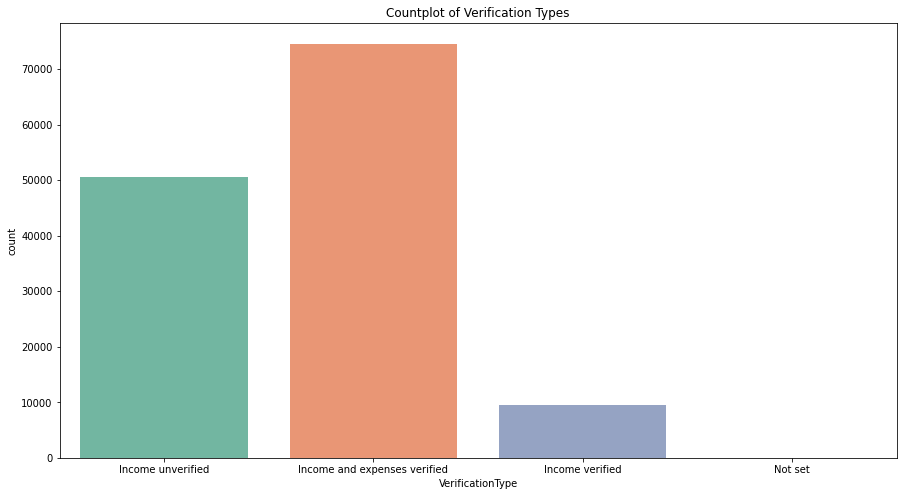

In [56]:
#countplot of varification status types
plt.figure(figsize=(15,8))
sns.countplot(x='VerificationType',data = cat_cols,palette='Set2')
plt.title('Countplot of Verification Types')
plt.show()

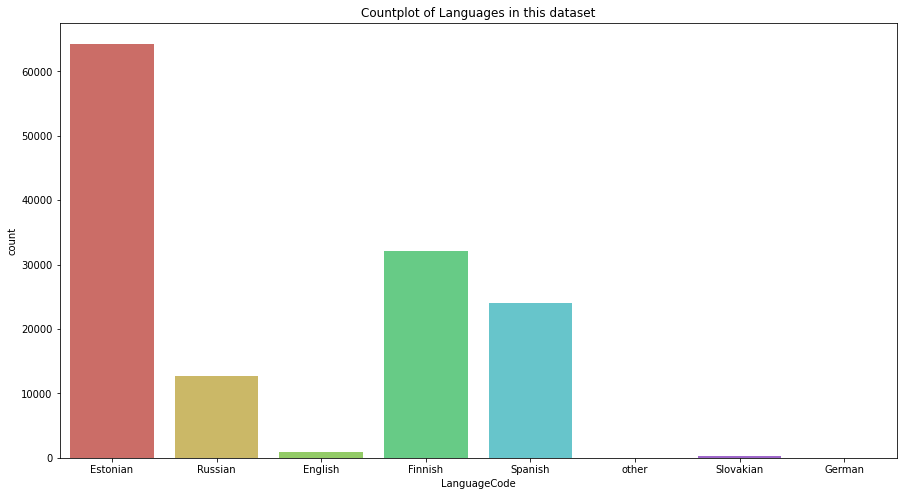

In [57]:
#countplot for checking the types of languages with count
plt.figure(figsize=(15,8))
sns.countplot(x='LanguageCode',data = cat_cols,palette='hls')
plt.title('Countplot of Languages in this dataset')
plt.show()

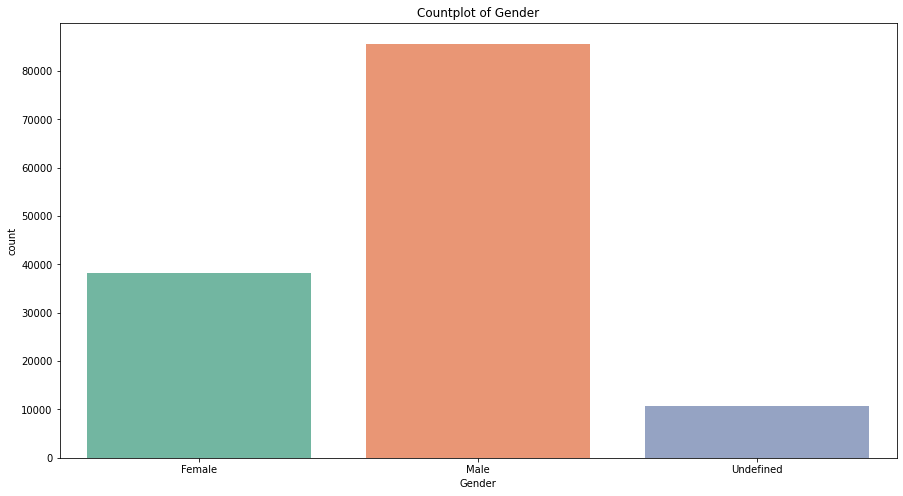

In [58]:
# Countplot of gender column
plt.figure(figsize=(15,8))
sns.color_palette("hls", 8)
sns.countplot(x='Gender',data = cat_cols,palette='Set2')
plt.title('Countplot of Gender')
plt.show()

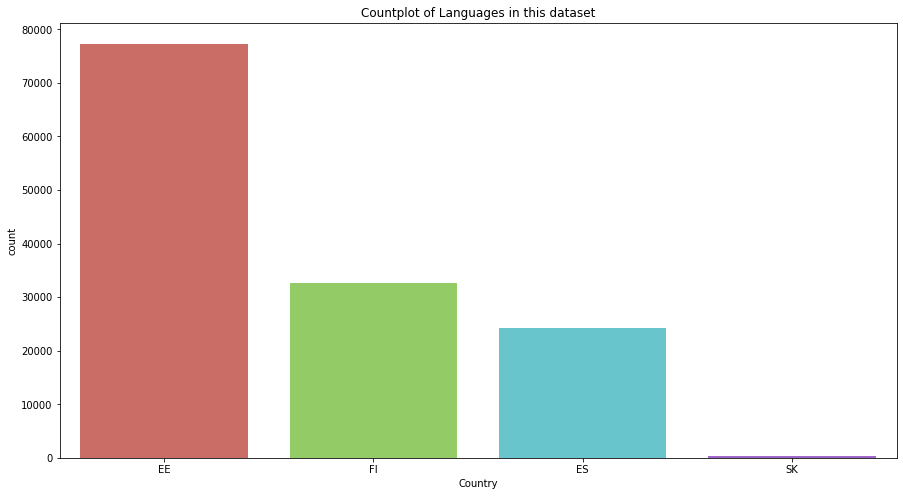

In [59]:
#countplot of different countries
plt.figure(figsize=(15,8))
sns.countplot(x='Country',data = cat_cols,palette='hls')
plt.title('Countplot of Languages in this dataset')
plt.show()

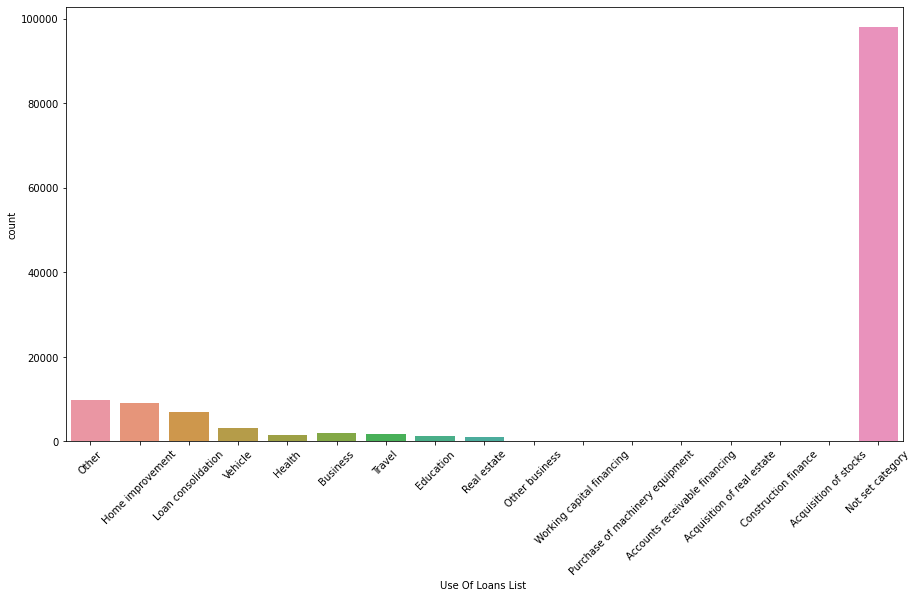

In [60]:
#Countplot of Use of loan
plt.figure(figsize=(15,8))
sns.countplot(x='UseOfLoan',data = cat_cols)
plt.xlabel("Use Of Loans List ")
plt.xticks(rotation=45)
plt.show()

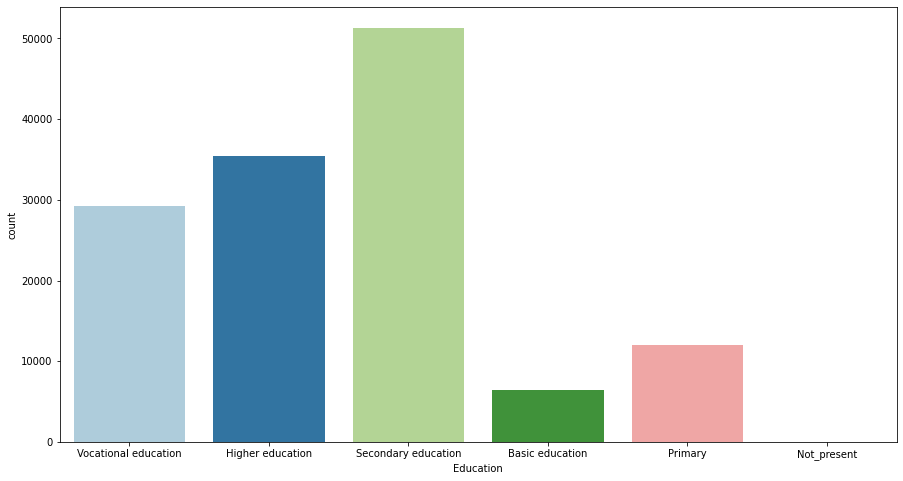

In [61]:
# countplot for Education Types 
plt.figure(figsize=(15,8))
sns.countplot(x='Education',data = cat_cols,palette='Paired')
plt.show()

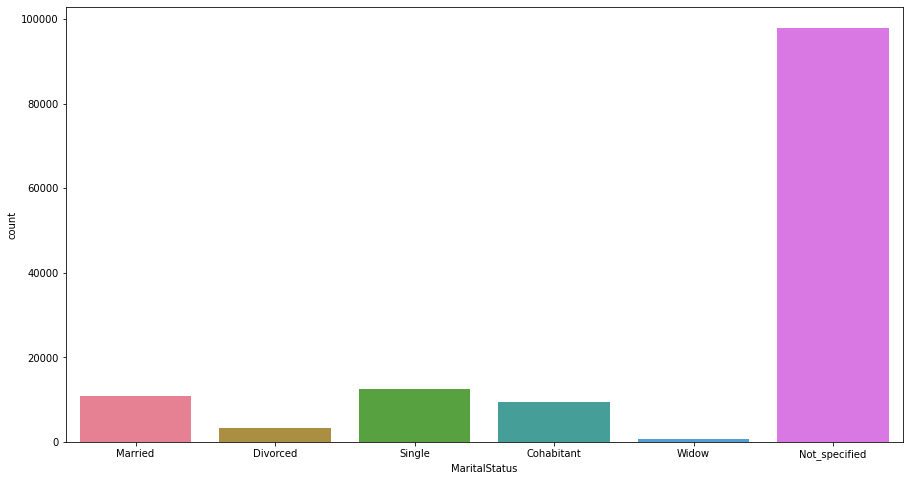

In [62]:
#countplot for Maritial status
plt.figure(figsize=(15,8))
sns.countplot(x='MaritalStatus',data = cat_cols,palette='husl')
plt.show()

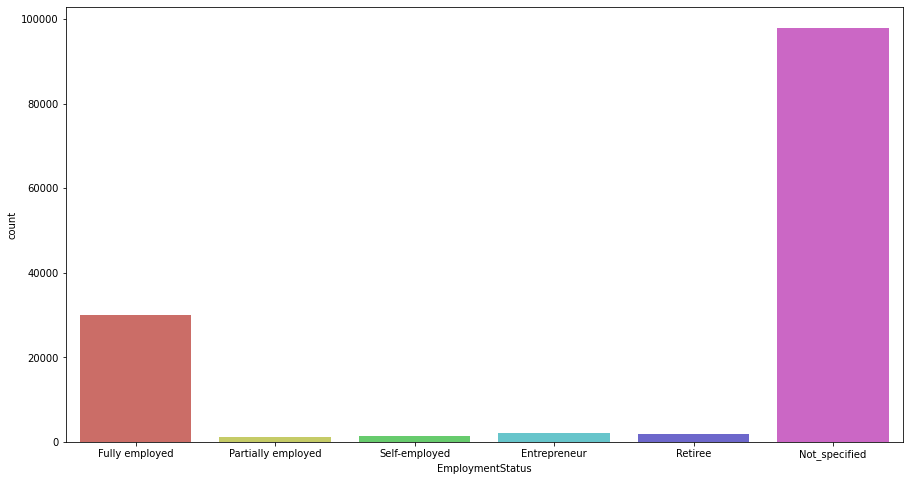

In [63]:
#countplot for Employment status

plt.figure(figsize=(15,8))
sns.countplot(x='EmploymentStatus',data = cat_cols,palette='hls')
plt.show()

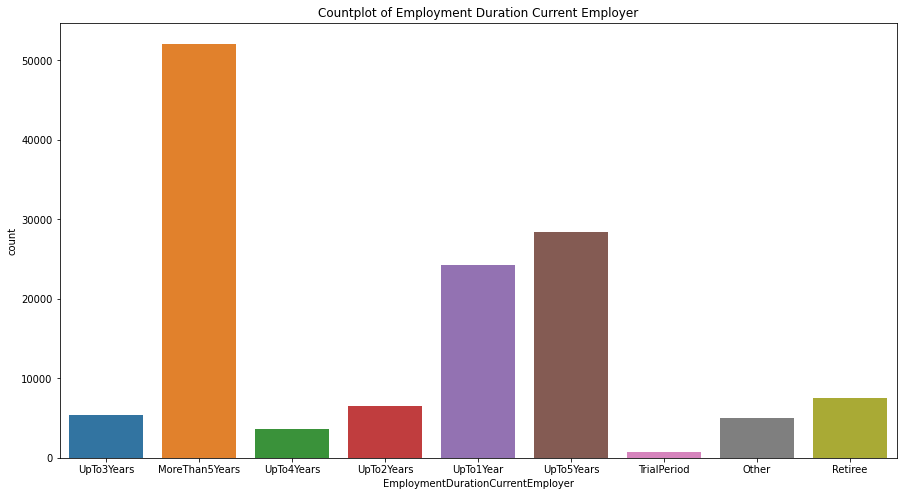

In [64]:
#countplot for Employment Duration Current Employer

plt.figure(figsize=(15,8))
sns.countplot(x='EmploymentDurationCurrentEmployer',data = cat_cols)
plt.title('Countplot of Employment Duration Current Employer')
plt.show()

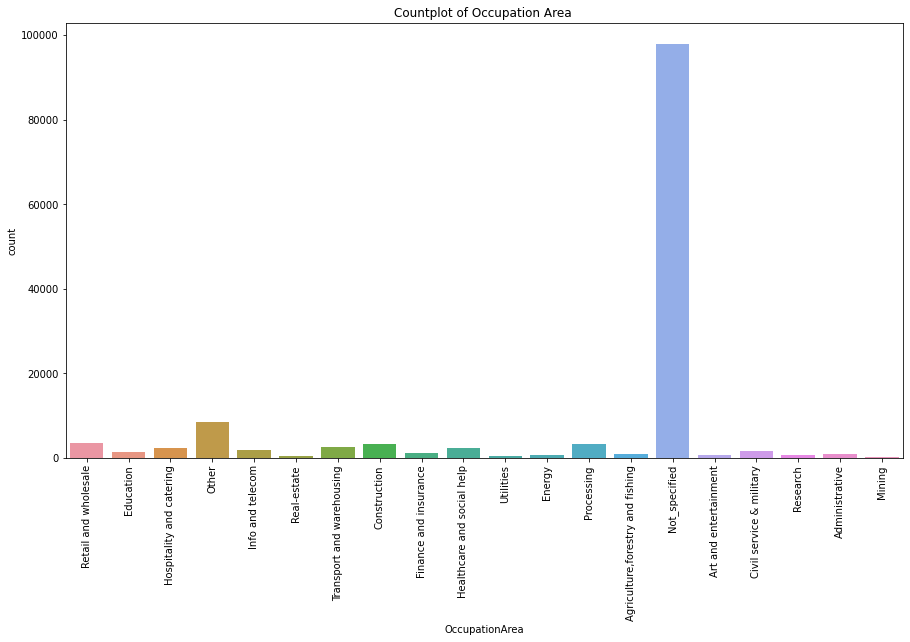

In [65]:
#countplot for Occupations people have
plt.figure(figsize=(15,8))
sns.countplot(x='OccupationArea',data = cat_cols)
plt.xticks(rotation=90)
plt.title('Countplot of Occupation Area ')
plt.show()

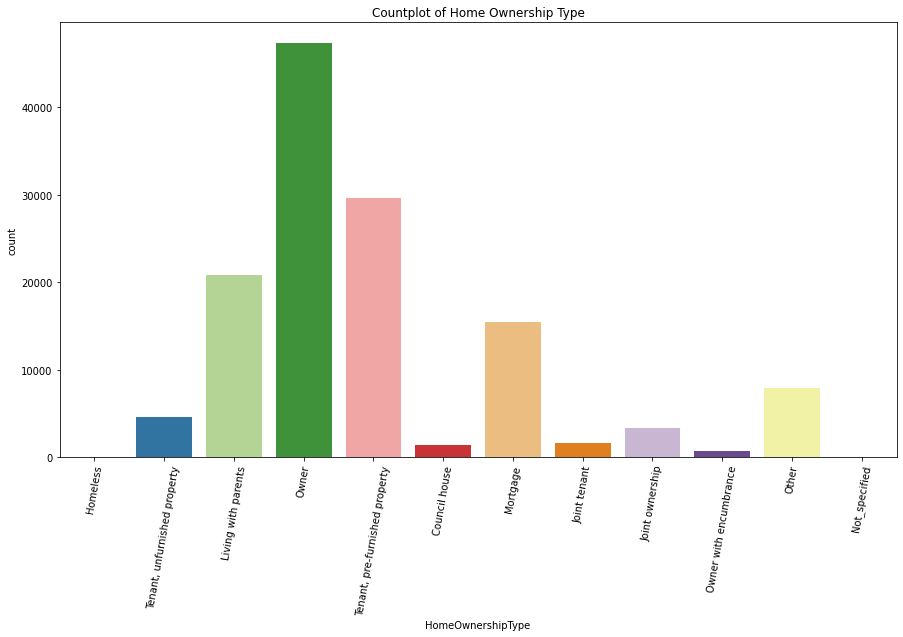

In [66]:
#countplot for Home ownership types 
plt.figure(figsize=(15,8))
sns.countplot(x='HomeOwnershipType',data = cat_cols,palette='Paired')
plt.xticks(rotation=80)
plt.title('Countplot of Home Ownership Type')
plt.show()

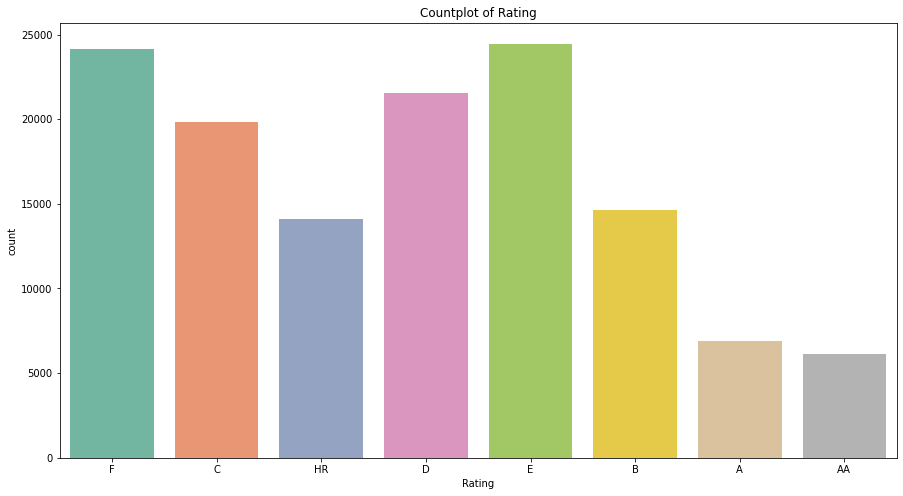

In [67]:
#countplot for Rating 
plt.figure(figsize=(15,8))
sns.countplot(x='Rating',data = cat_cols,palette='Set2')
plt.title('Countplot of Rating')
plt.show()

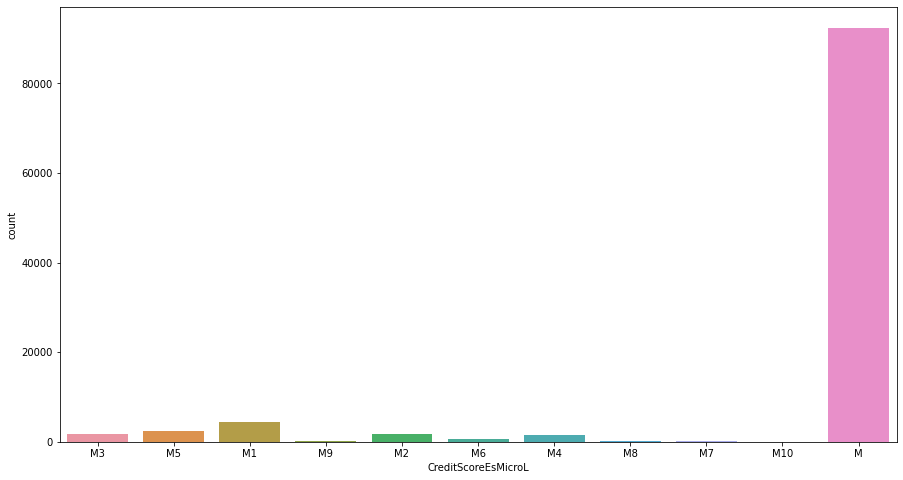

In [68]:
#countplot for credit score 
plt.figure(figsize=(15,8))
sns.countplot(x='CreditScoreEsMicroL',data = cat_cols)
plt.show()

#### NOTE : 
there are three columns which are [ 'City' ,'County' ,'LastPaymentOn' ]
and their data is not that much unique for plotting.


# checking distribution of all numeric columns

In [69]:
#create new df for only categorical columns
num_cols = loan.select_dtypes(include =np.number)
num_cols.head().T

0         1        2         3  \
BidsPortfolioManager                       0.000     0.000    0.000     0.000   
BidsApi                                    0.000     0.000    0.000     0.000   
BidsManual                               115.041   140.606  319.558    57.520   
NewCreditCustomer                          0.000     1.000    0.000     0.000   
Age                                       61.000    48.000   58.000    23.000   
AppliedAmount                            319.558   191.735  319.558   127.823   
Amount                                   115.041   140.606  319.541    57.520   
Interest                                  30.000    25.000   25.000    45.000   
LoanDuration                              12.000     1.000   20.000    15.000   
MonthlyPayment                               NaN       NaN      NaN       NaN   
IncomeTotal                            10500.000 10800.000 7000.000 11600.000   
ExistingLiabilities                        0.000     0.000    0.000     0.000   
LiabilitiesTotal                           0.000     0.000    0.000     0.000   
RefinanceLiabilities                       0.000     0.000    0.000     0.000   
DebtToIncome                               0.000     0.000    0.000     0.000   
FreeCash                                   0.000     0.000    0.000     0.000   
MonthlyPaymentDay                         25.000    15.000   25.000    15.000   
Restructured                               1.000     1.000    0.000     1.000   
PrincipalPaymentsMade                    115.041   140.606  203.191    57.520   
InterestAndPenaltyPaymentsMade            20.422     2.023   59.763    18.732   
PrincipalBalance                           0.000     0.000  116.350     0.000   
InterestAndPenaltyBalance                  0.000     0.000  414.070     0.000   
NoOfPreviousLoansBeforeLoan                1.000     2.000    0.000     1.000   
AmountOfPreviousLoansBeforeLoan           83.085   255.647    0.000   134.214   
PreviousRepaymentsBeforeLoan               0.000   258.626    0.000     0.000   
PreviousEarlyRepaymentsCountBeforeLoan     0.000     0.000    0.000     0.000   

                                              4  
BidsPortfolioManager                      0.000  
BidsApi                                   0.000  
BidsManual                              319.558  
NewCreditCustomer                         0.000  
Age                                      25.000  
AppliedAmount                           319.558  
Amount                                  319.544  
Interest                                 30.000  
LoanDuration                             12.000  
MonthlyPayment                              NaN  
IncomeTotal                            6800.000  
ExistingLiabilities                       0.000  
LiabilitiesTotal                          0.000  
RefinanceLiabilities                      0.000  
DebtToIncome                              0.000  
FreeCash                                  0.000  
MonthlyPaymentDay                        25.000  
Restructured                              1.000  
PrincipalPaymentsMade                   319.544  
InterestAndPenaltyPaymentsMade          220.420  
PrincipalBalance                          0.000  
InterestAndPenaltyBalance                 0.000  
NoOfPreviousLoansBeforeLoan               1.000  
AmountOfPreviousLoansBeforeLoan         146.997  
PreviousRepaymentsBeforeLoan              0.000  
PreviousEarlyRepaymentsCountBeforeLoan    0.000

In [70]:
num_cols.columns.tolist()

['BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'NewCreditCustomer',
 'Age',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'FreeCash',
 'MonthlyPaymentDay',
 'Restructured',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoan',
 'PreviousRepaymentsBeforeLoan',
 'PreviousEarlyRepaymentsCountBeforeLoan']

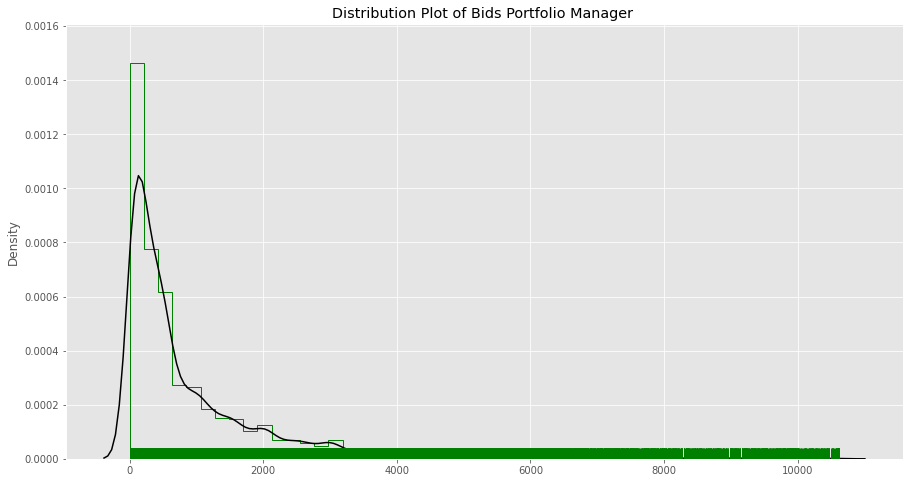

In [71]:
#distribution plot for bids portfolio manager column
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
sns.distplot(x=num_cols.BidsPortfolioManager,rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth":1,"alpha":1,"color": "g"})
plt.title('Distribution Plot of Bids Portfolio Manager ')
plt.show()

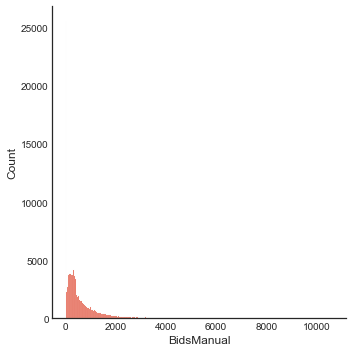

In [72]:
#distribution plot for bidsmanual column
plt.style.use("seaborn-white")
sns.displot(x='BidsManual',data=num_cols)

<AxesSubplot:xlabel='NewCreditCustomer', ylabel='Count'>

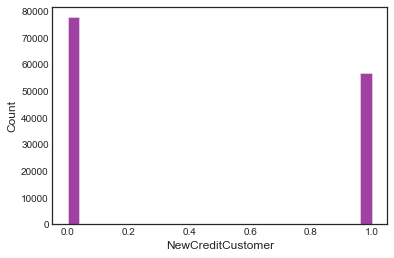

In [73]:
#Histogram plot for New credit customer column
plt.style.use("seaborn-white")
sns.histplot(x='NewCreditCustomer',data=num_cols,color= 'purple')

<AxesSubplot:xlabel='Age', ylabel='Count'>

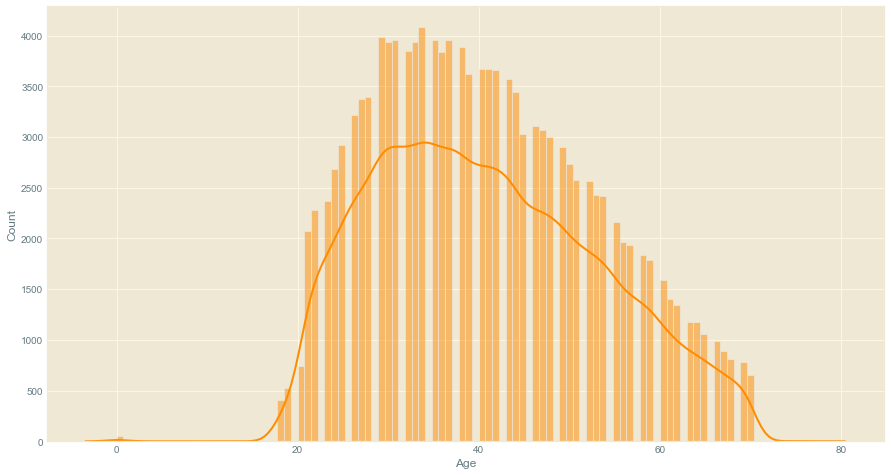

In [74]:
#Histogram plot for Age column
plt.figure(figsize=(15,8))
plt.style.use("Solarize_Light2")
sns.histplot(num_cols["Age"],palette='hls',kde=True,kde_kws=dict(cut=3),color= 'darkorange')

<AxesSubplot:xlabel='AppliedAmount', ylabel='Count'>

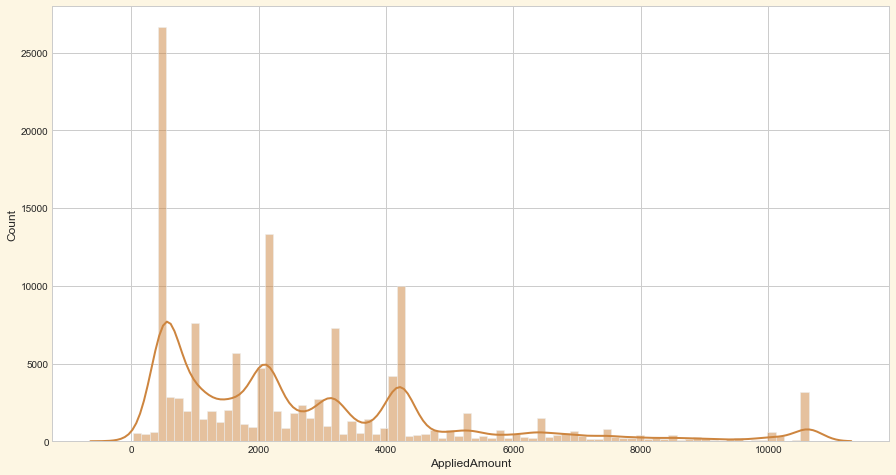

In [75]:
#Histogram plot for Applied amount column
plt.figure(figsize=(15,8))
plt.style.use("seaborn-whitegrid")
sns.histplot(num_cols["AppliedAmount"],palette='husl',kde=True,kde_kws=dict(cut=3),color= 'peru')

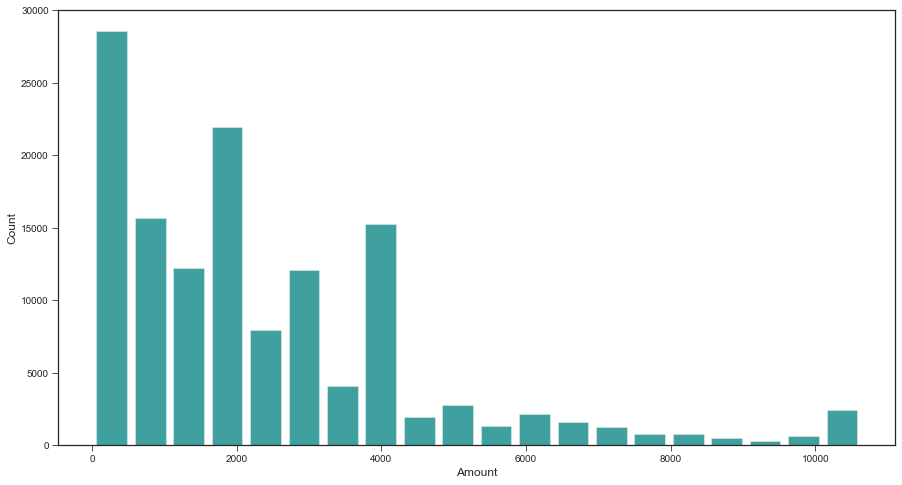

In [76]:
#Histogram plot for Amount column
plt.figure(figsize=(15,8))
plt.style.use("seaborn-ticks")
sns.histplot(num_cols["Amount"],bins= 20,shrink=.8,color = 'teal')
plt.show()

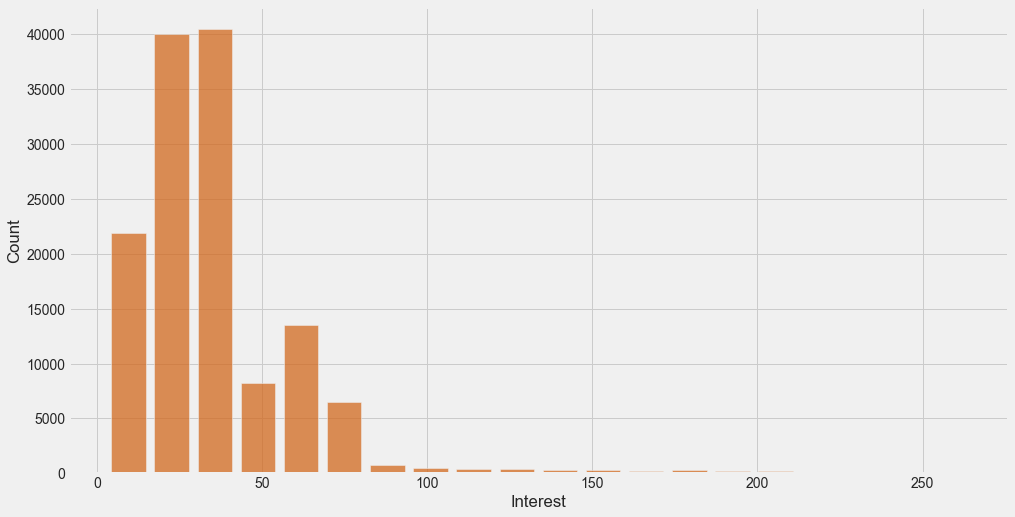

In [77]:
#Histogram plot for Interest column
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
sns.histplot(num_cols["Interest"],bins= 20,shrink=.8,color = 'chocolate')
plt.show()

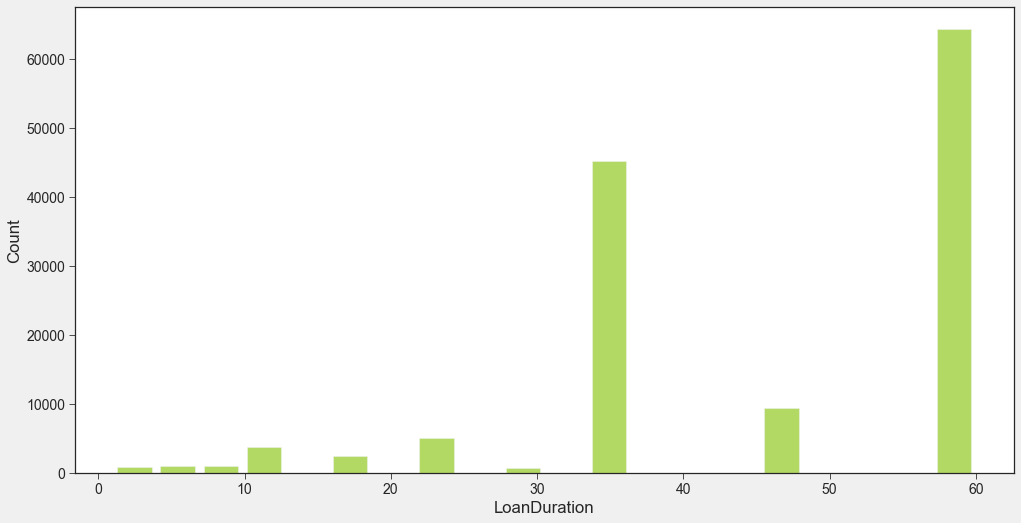

In [78]:
#Histogram plot for Loan Duration column
plt.figure(figsize=(15,8))
plt.style.use("seaborn-ticks")
sns.histplot(num_cols["LoanDuration"],bins= 20,shrink=.8,color = 'yellowgreen')
plt.show()

<Figure size 1080x576 with 0 Axes>

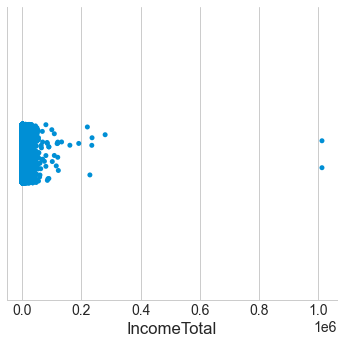

In [79]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(15,8))
sns.catplot(x='IncomeTotal',data= num_cols)
plt.show()

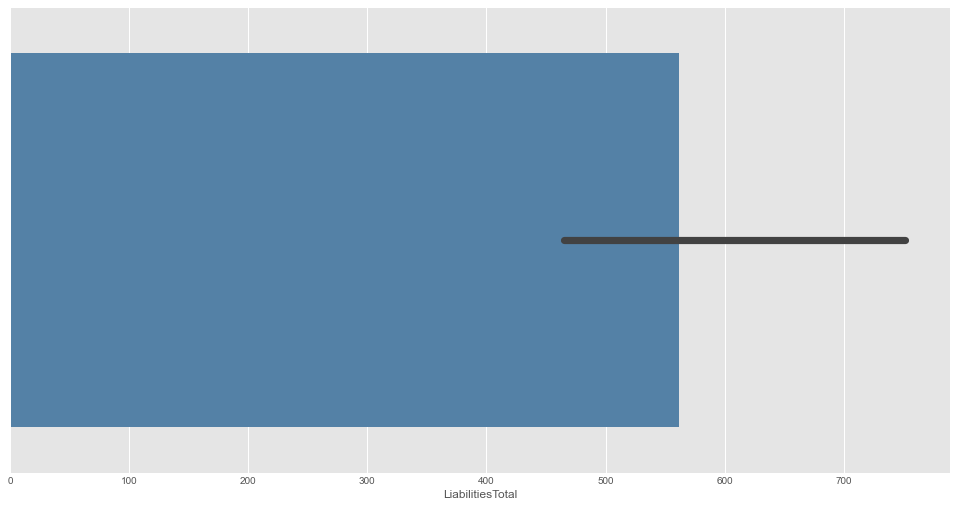

In [80]:
plt.style.use("ggplot")
sns.color_palette('plasma')
plt.figure(figsize=(15,8))
sns.barplot(x='LiabilitiesTotal',data= num_cols,color='steelblue')
plt.show()

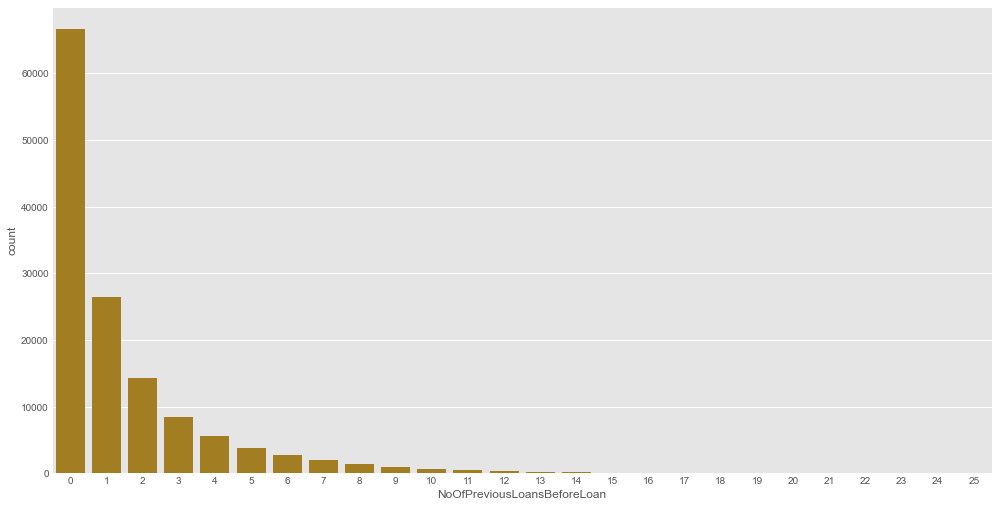

In [81]:
plt.style.use("ggplot")
sns.color_palette('plasma')
plt.figure(figsize=(15,8))
sns.countplot(x='NoOfPreviousLoansBeforeLoan',data= num_cols,color='darkgoldenrod')
plt.show()

<Figure size 1080x576 with 0 Axes>

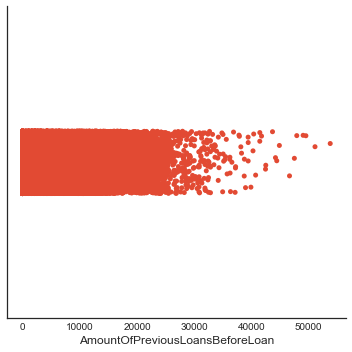

In [82]:
plt.style.use("seaborn-white")
sns.color_palette('plasma')
plt.figure(figsize=(15,8))
sns.catplot(x='AmountOfPreviousLoansBeforeLoan',data= num_cols)
plt.show()

NOTE :: there are two columns which have large non unique data ['BidApi' , 'LiabilitiesTotal']

## BIVARIATE ANALYSIS

In [113]:
#categorical columns
cat_cols.columns.tolist()

['LoanDate',
 'FirstPaymentDate',
 'MaturityDate_Original',
 'MaturityDate_Last',
 'VerificationType',
 'LanguageCode',
 'Gender',
 'Country',
 'County',
 'City',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'OccupationArea',
 'HomeOwnershipType',
 'LastPaymentOn',
 'Rating',
 'CreditScoreEsMicroL']

In [114]:
#Numerical columns
num_cols.columns.tolist()

['BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'NewCreditCustomer',
 'Age',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'FreeCash',
 'MonthlyPaymentDay',
 'Restructured',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoan',
 'PreviousRepaymentsBeforeLoan',
 'PreviousEarlyRepaymentsCountBeforeLoan']

<AxesSubplot:xlabel='Age', ylabel='AppliedAmount'>

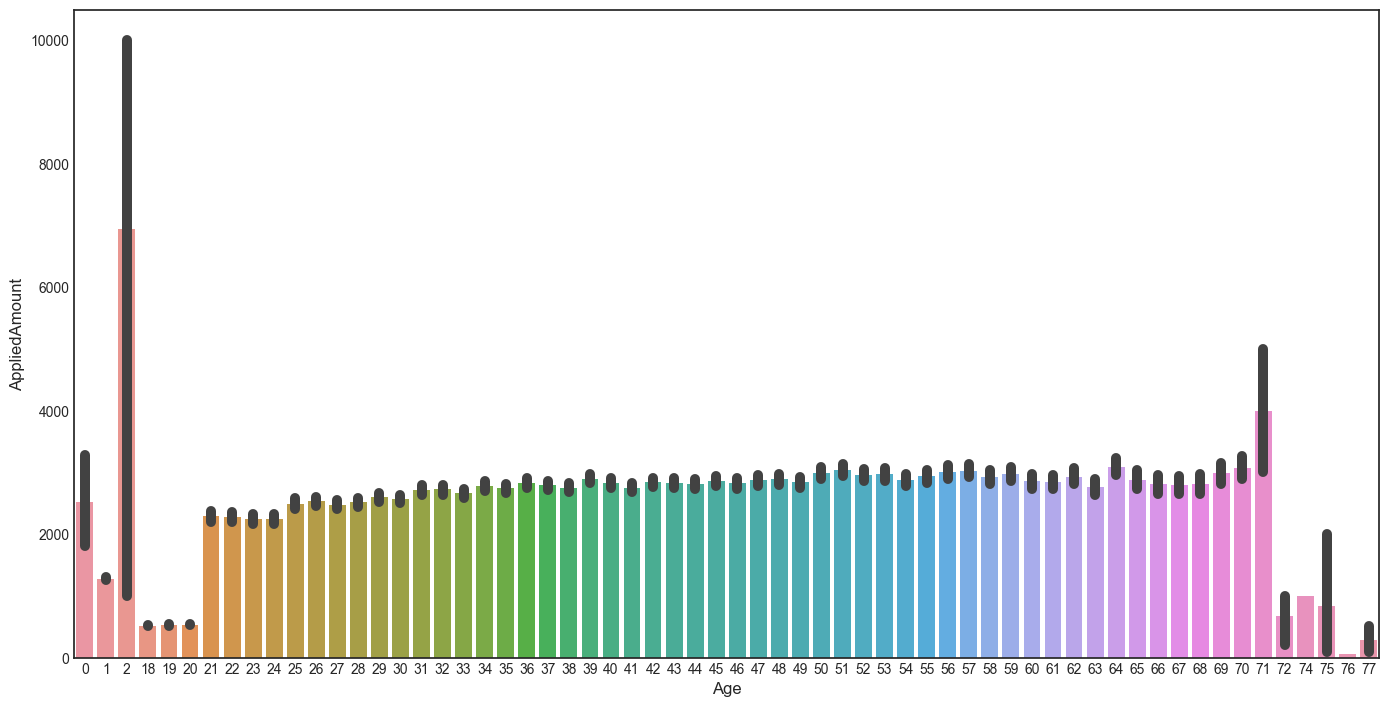

In [85]:
#AGE vs AppliedAmount
plt.figure(figsize=(15,8),dpi=100)
sns.barplot(x='Age',y='AppliedAmount',data= loan)

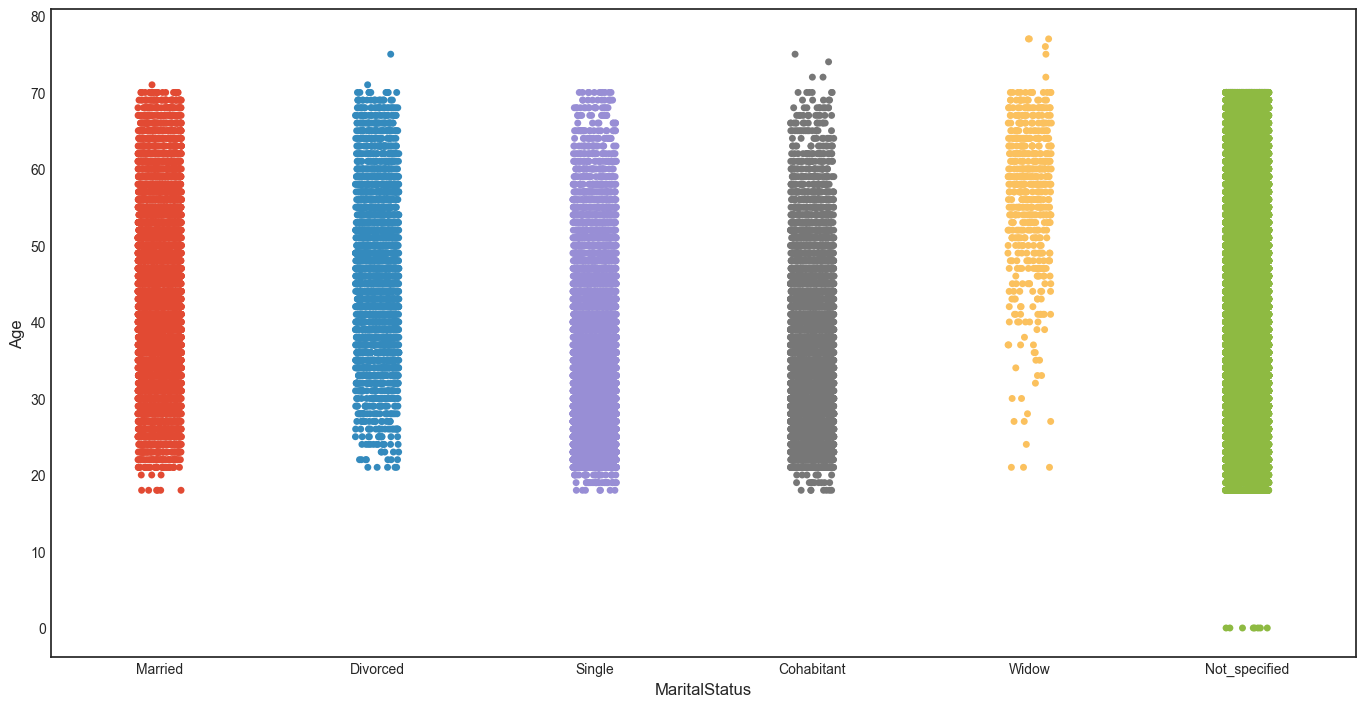

In [86]:
#Age vs MariatialStatus
plt.figure(figsize=(15,8),dpi=100)
sns.stripplot(x=loan.MaritalStatus,y=loan.Age)
plt.show()

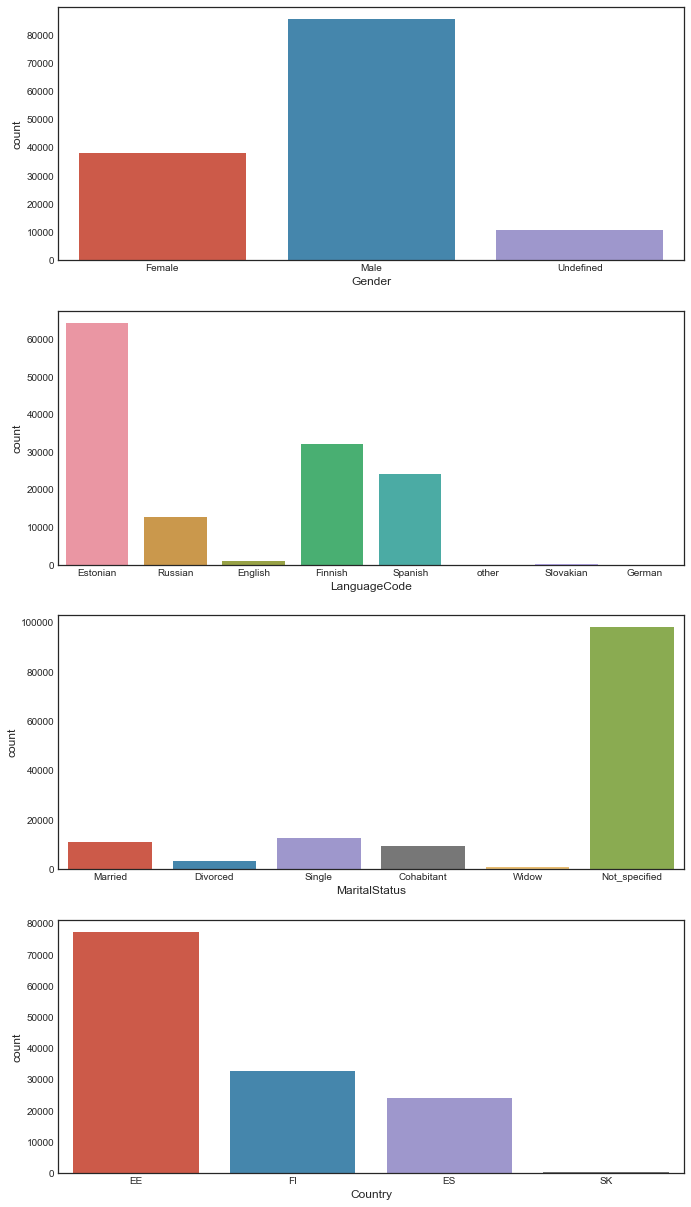

In [87]:
#Countplot for gender , languagecode,country,maritial status
plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
sns.countplot(loan.Gender)
plt.subplot(4,1,2)
sns.countplot(loan.LanguageCode)
plt.subplot(4,1,3)
sns.countplot(loan.MaritalStatus)
plt.subplot(4,1,4)
sns.countplot(loan.Country)
plt.show()

<AxesSubplot:xlabel='LoanDuration', ylabel='Amount'>

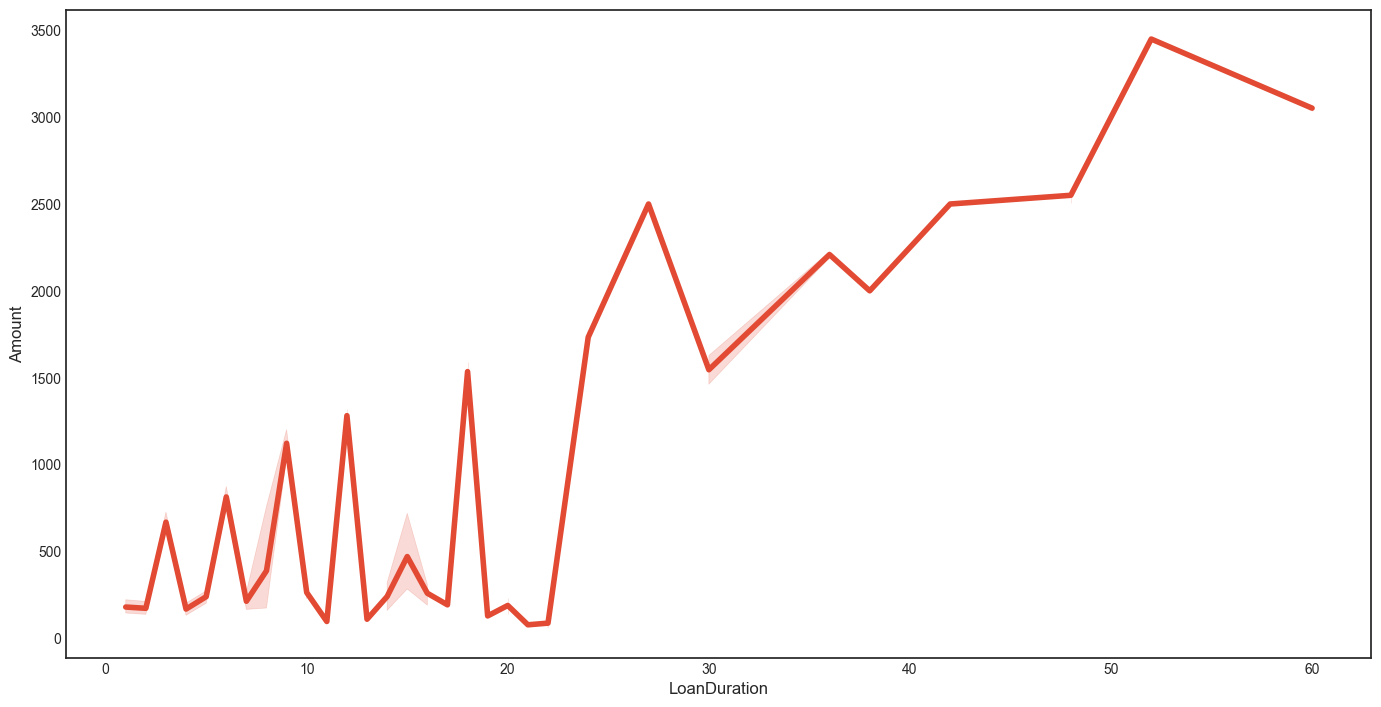

In [88]:
#Lineplot for Loanduration vs Amount columns
plt.figure(figsize=(15,8),dpi=100)
sns.lineplot(x='LoanDuration',y='Amount',data= loan)

<AxesSubplot:xlabel='LoanDuration', ylabel='Amount'>

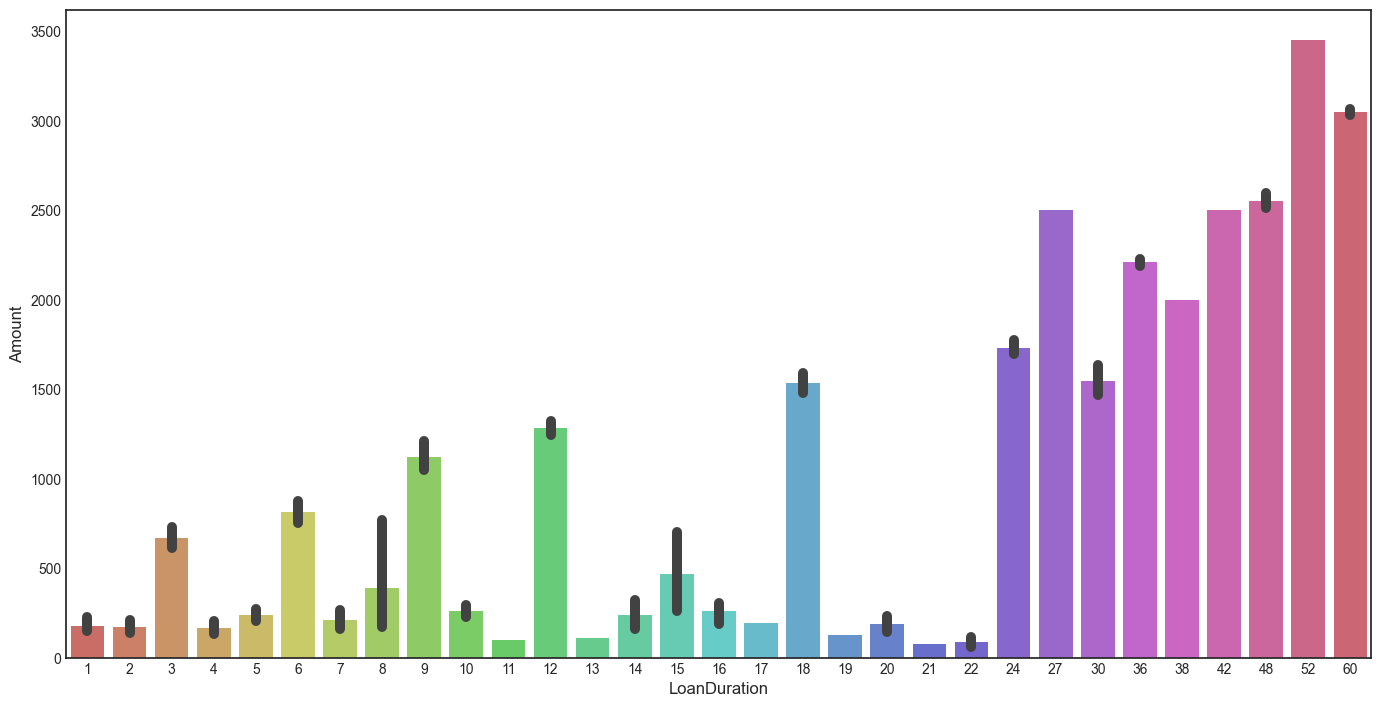

In [89]:
#bar plot for loan duration column vs amount column
plt.figure(figsize=(15,8),dpi=100)
sns.barplot(x='LoanDuration',y='Amount',data= loan,palette='hls')

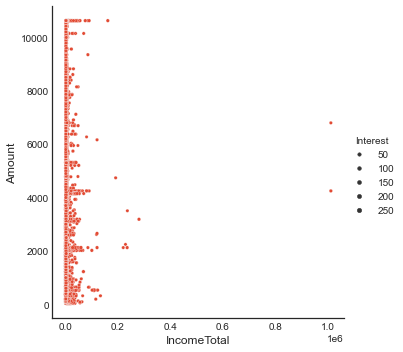

In [90]:
#relational plot for incometotal and amount columns 
sns.relplot(x=loan.IncomeTotal, y=loan.Amount, size=loan.Interest,sizes=(10, 20), data=loan)  

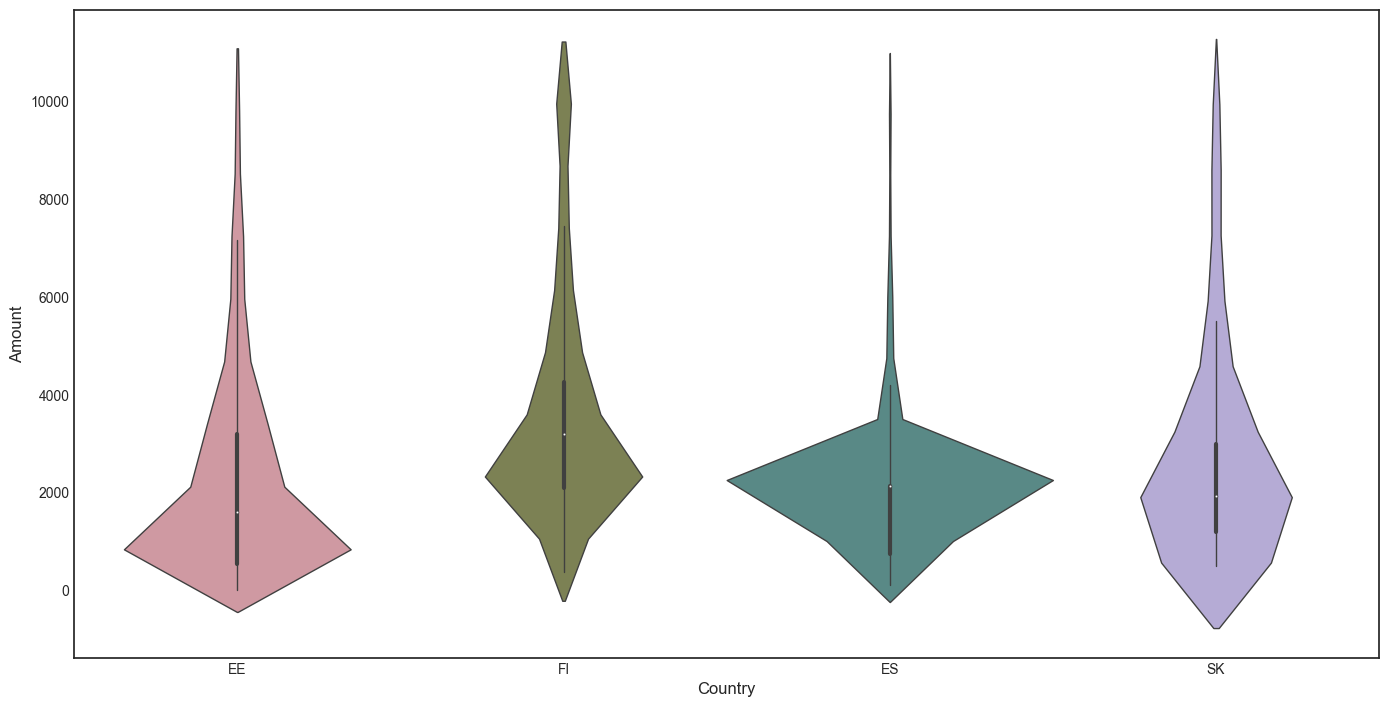

In [91]:
#violine plot for country and loan
plt.figure(figsize=(15,8),dpi=100)
sns.violinplot(x=loan.Country,y=loan.Amount,gridsize=10,width=1,inner='box',split=True,
               dodge=False,linewidth=1,palette='husl',saturation=0.40)
plt.show()

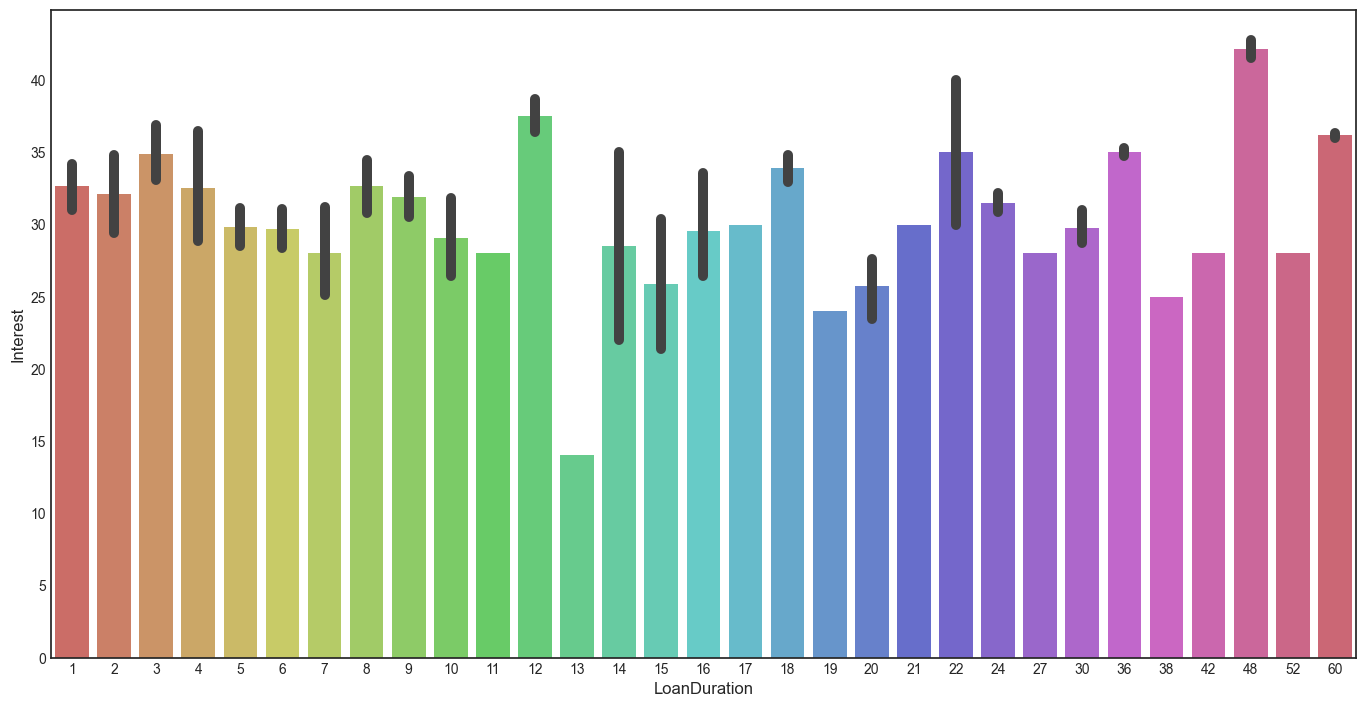

In [92]:
plt.figure(figsize=(15,8),dpi=100)
sns.barplot(x=loan.LoanDuration,y=loan.Interest,palette='hls')
plt.show()

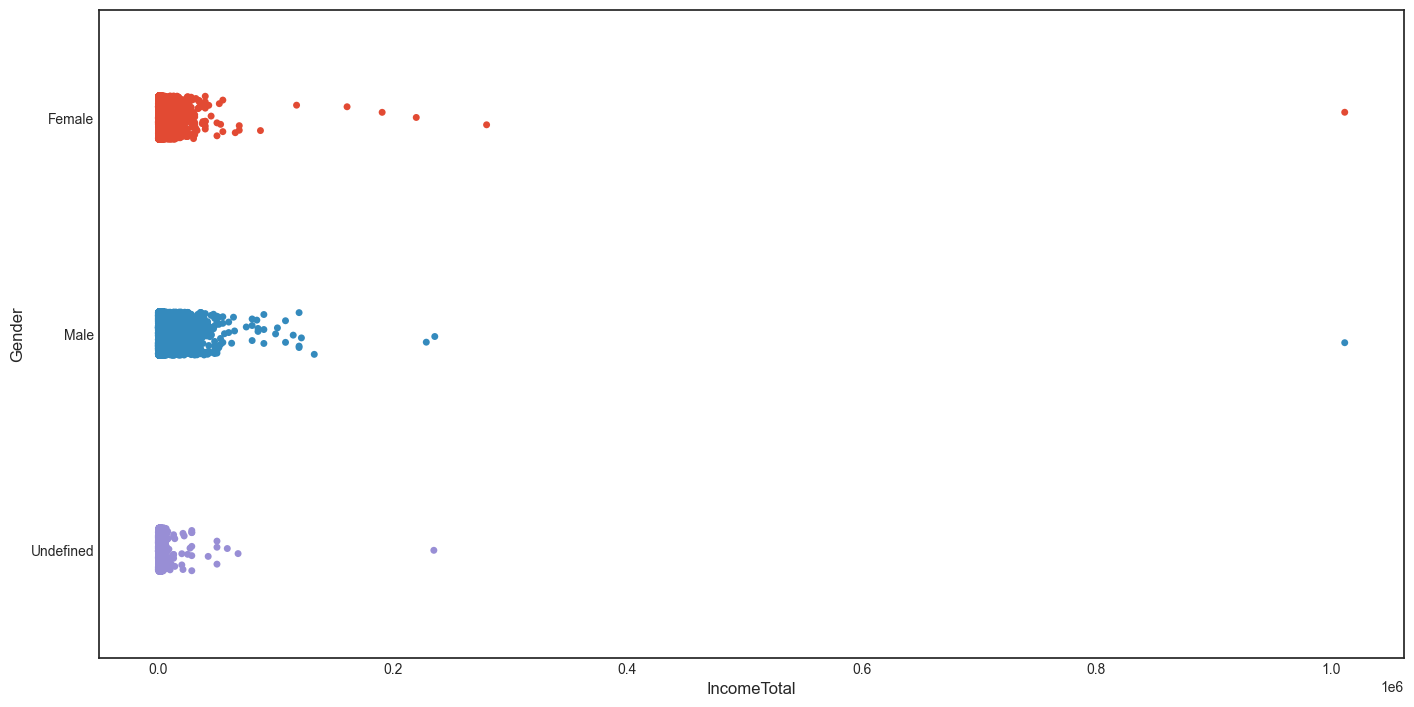

In [93]:
plt.figure(figsize=(15,8),dpi=100)
sns.stripplot(x=loan.IncomeTotal,y=loan.Gender)
plt.show()

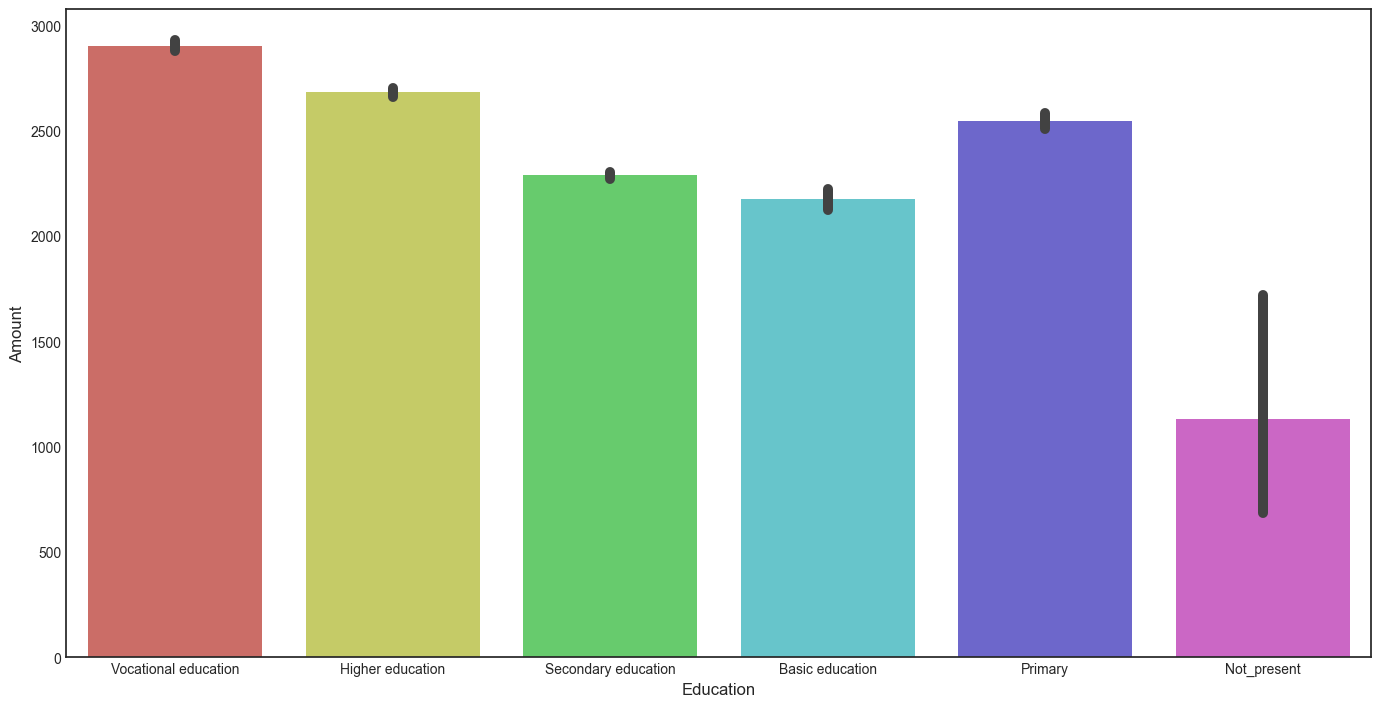

In [94]:
plt.figure(figsize=(15,8),dpi=100)
sns.barplot(x=loan.Education,y=loan.Amount,palette='hls')
plt.show()

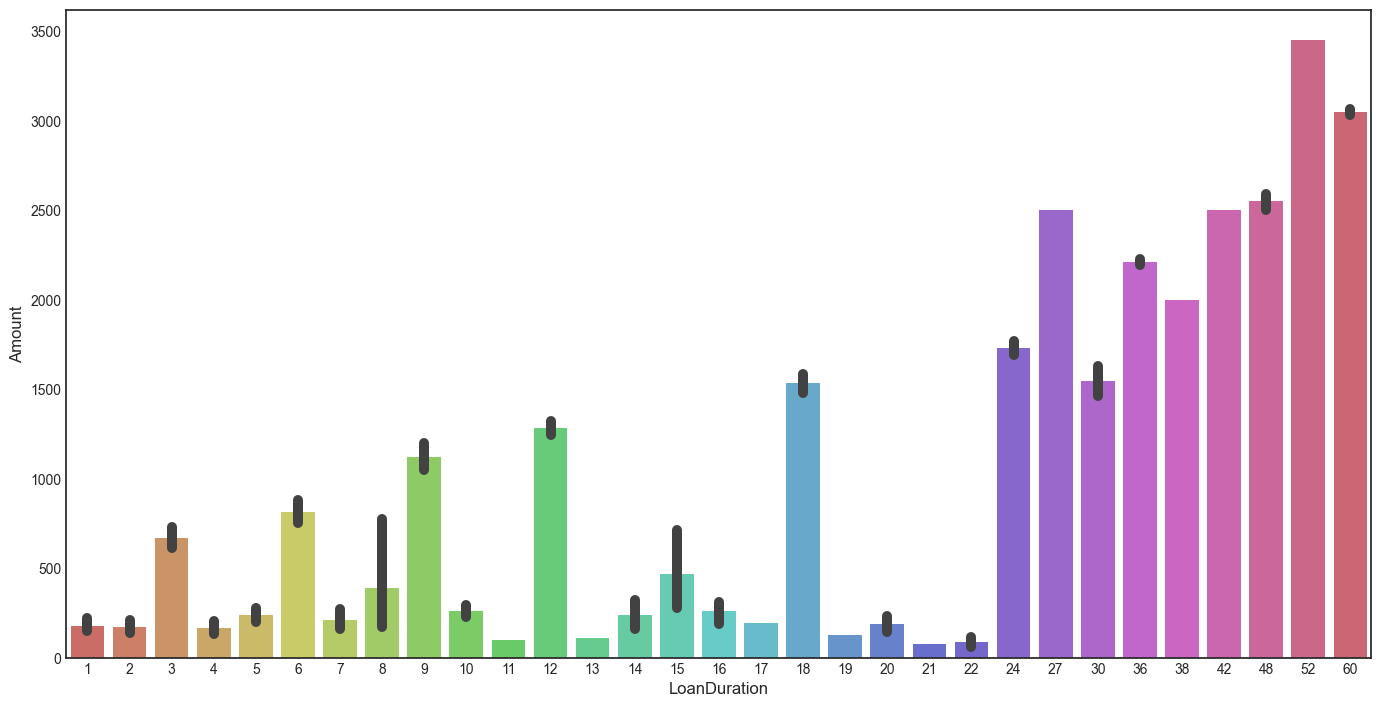

In [95]:
plt.figure(figsize=(15,8),dpi=100)
sns.barplot(x=loan.LoanDuration,y=loan.Amount,palette='hls')
plt.show()

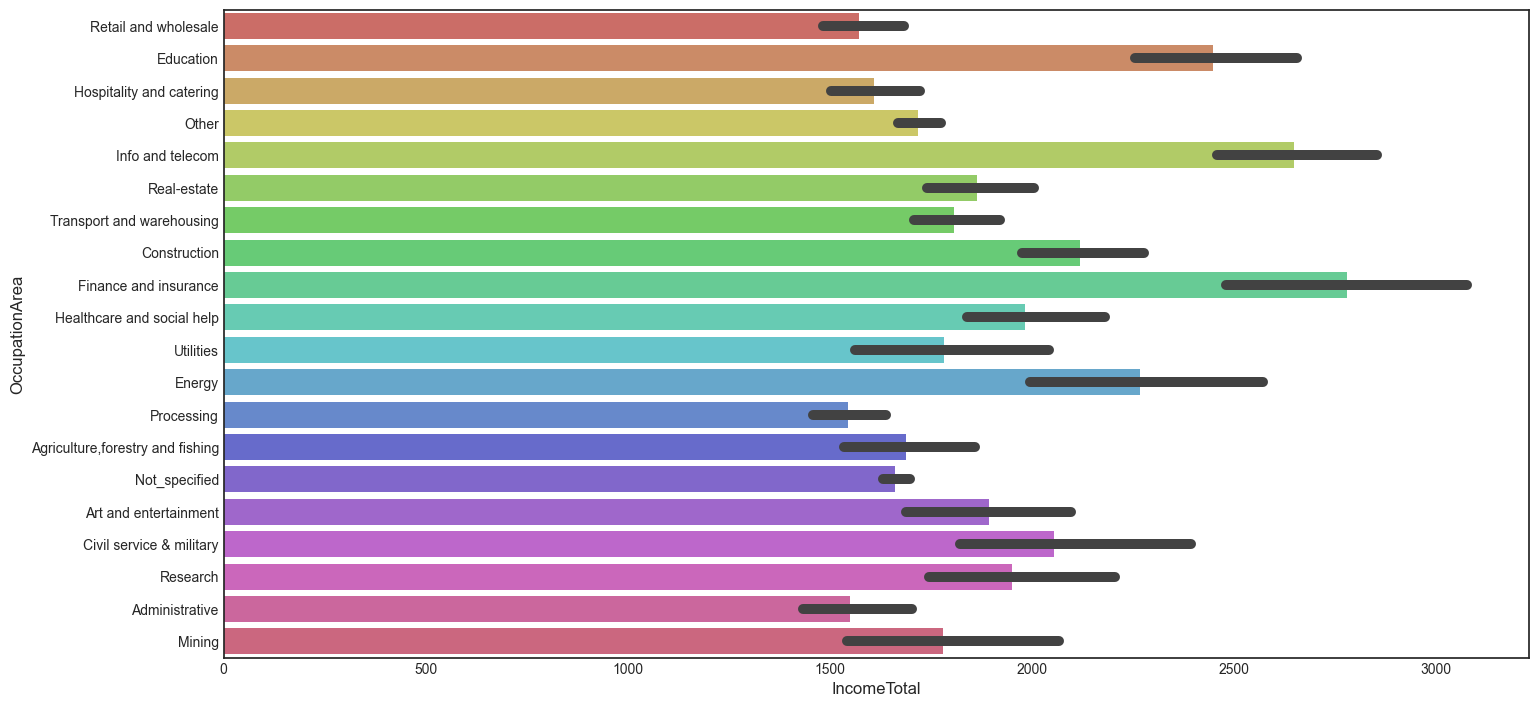

In [96]:
plt.figure(figsize=(15,8),dpi=100)
sns.barplot(x=loan.IncomeTotal,y=loan.OccupationArea,palette='hls')
plt.show()

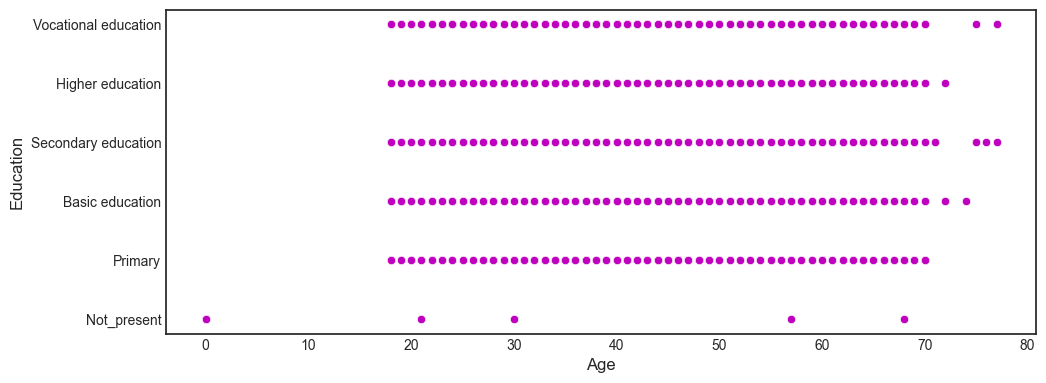

In [97]:
sns.set_style("ticks")
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=loan,y=loan.Education,x=loan.Age,palette='husl',color='m')
plt.show()

<Figure size 1000x800 with 0 Axes>

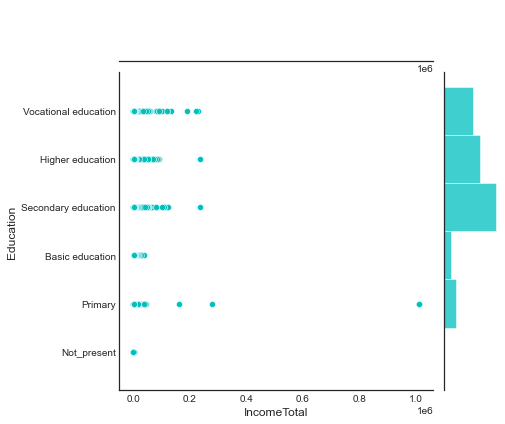

In [98]:
sns.set_style("ticks")
plt.figure(figsize=(10,8),dpi=100)
sns.jointplot(data=loan,y=loan.Education,x=loan.IncomeTotal,palette='husl',color='c')
plt.show()

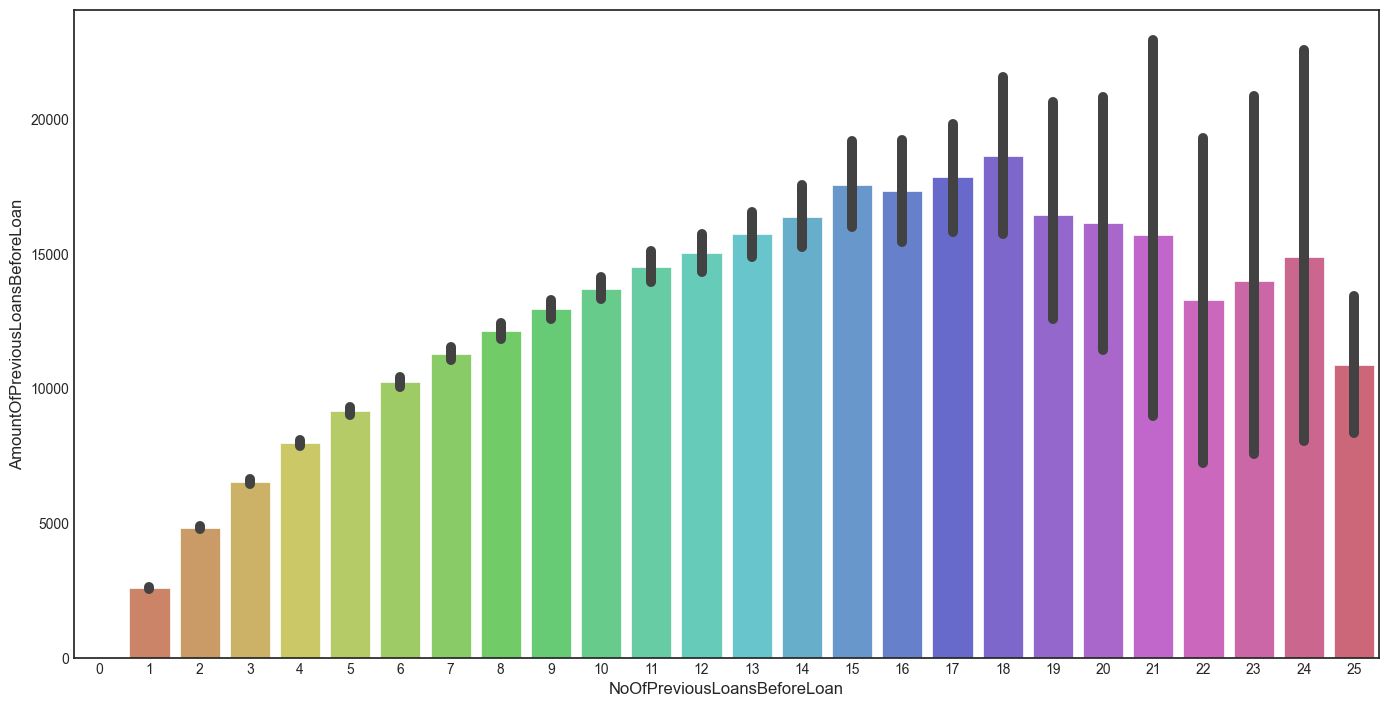

In [99]:
plt.figure(figsize=(15,8),dpi=100)
sns.barplot(x=loan.NoOfPreviousLoansBeforeLoan,y=loan.AmountOfPreviousLoansBeforeLoan,palette='hls')
plt.show()

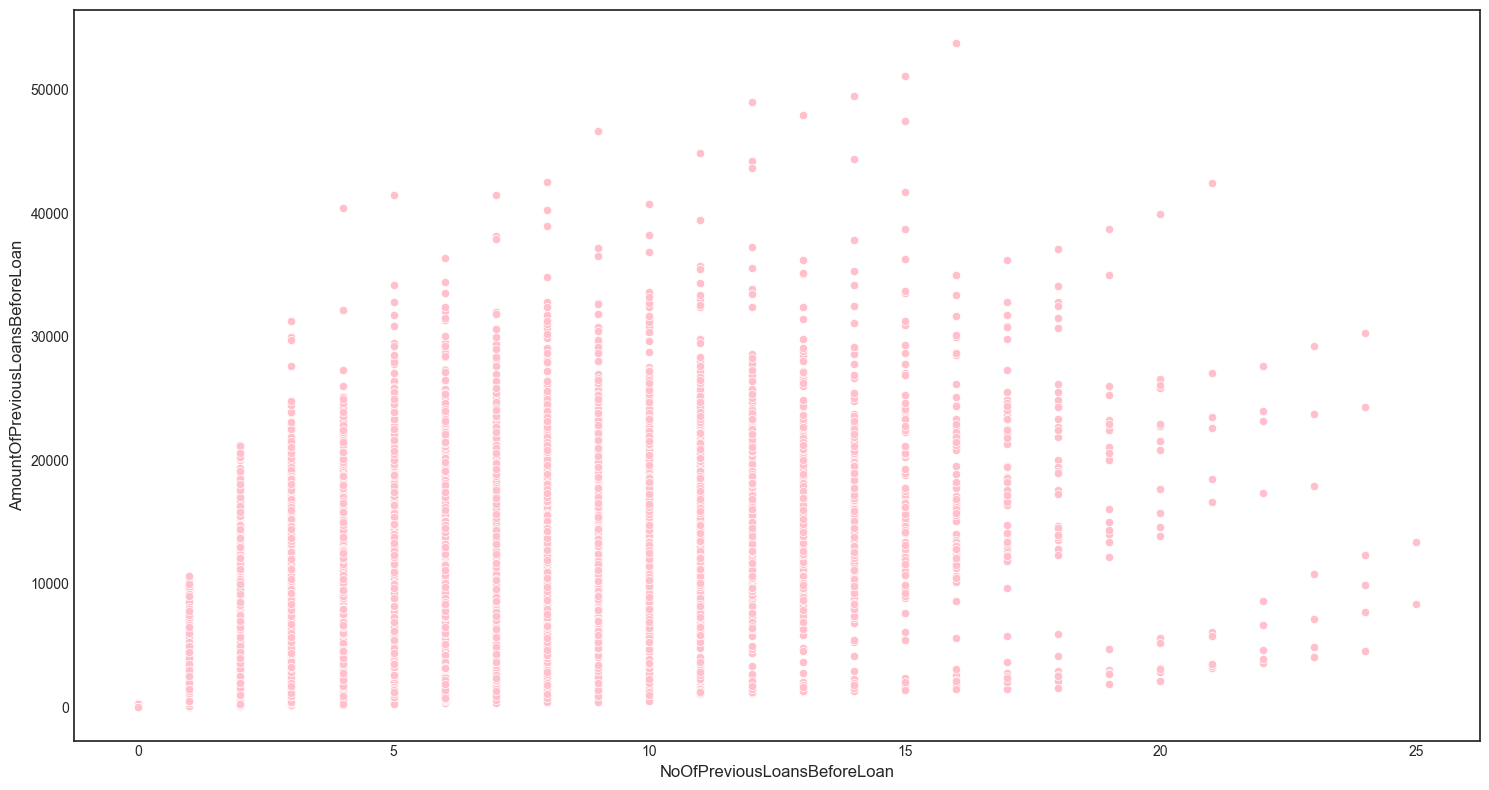

In [100]:
plt.figure(figsize=(15,8),dpi=100)
sns.scatterplot(x=loan.NoOfPreviousLoansBeforeLoan,y=loan.AmountOfPreviousLoansBeforeLoan,palette='husl',color='pink')
plt.tight_layout()
plt.show()

# Multivariate Analysis

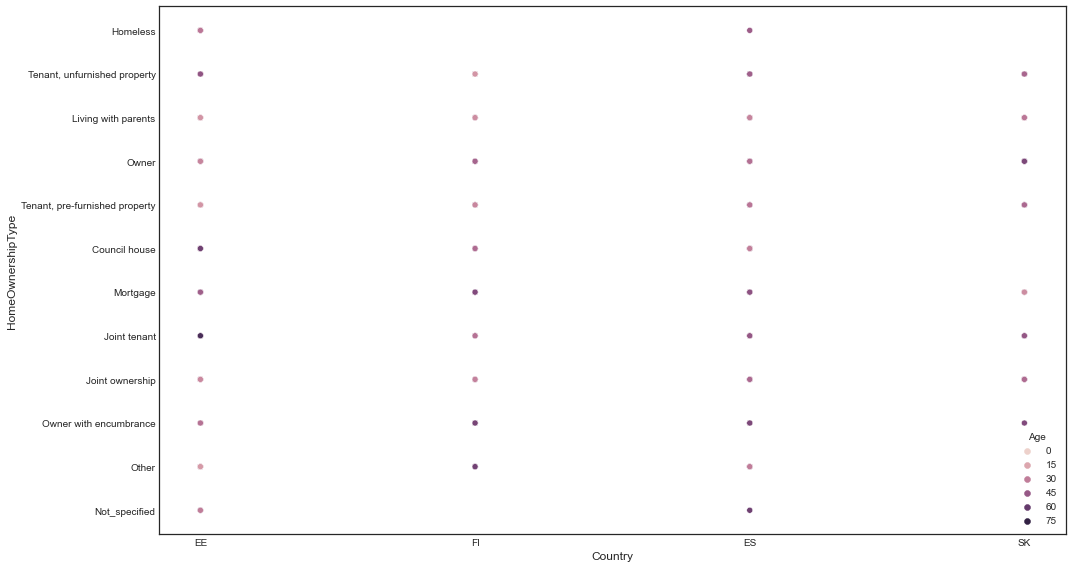

In [101]:
plt.style.use("seaborn-white")
sns.color_palette('plasma')
plt.figure(figsize=(15,8))
sns.scatterplot(x= cat_cols['Country'],y=cat_cols["HomeOwnershipType"],hue=num_cols["Age"])
plt.tight_layout()
plt.show()

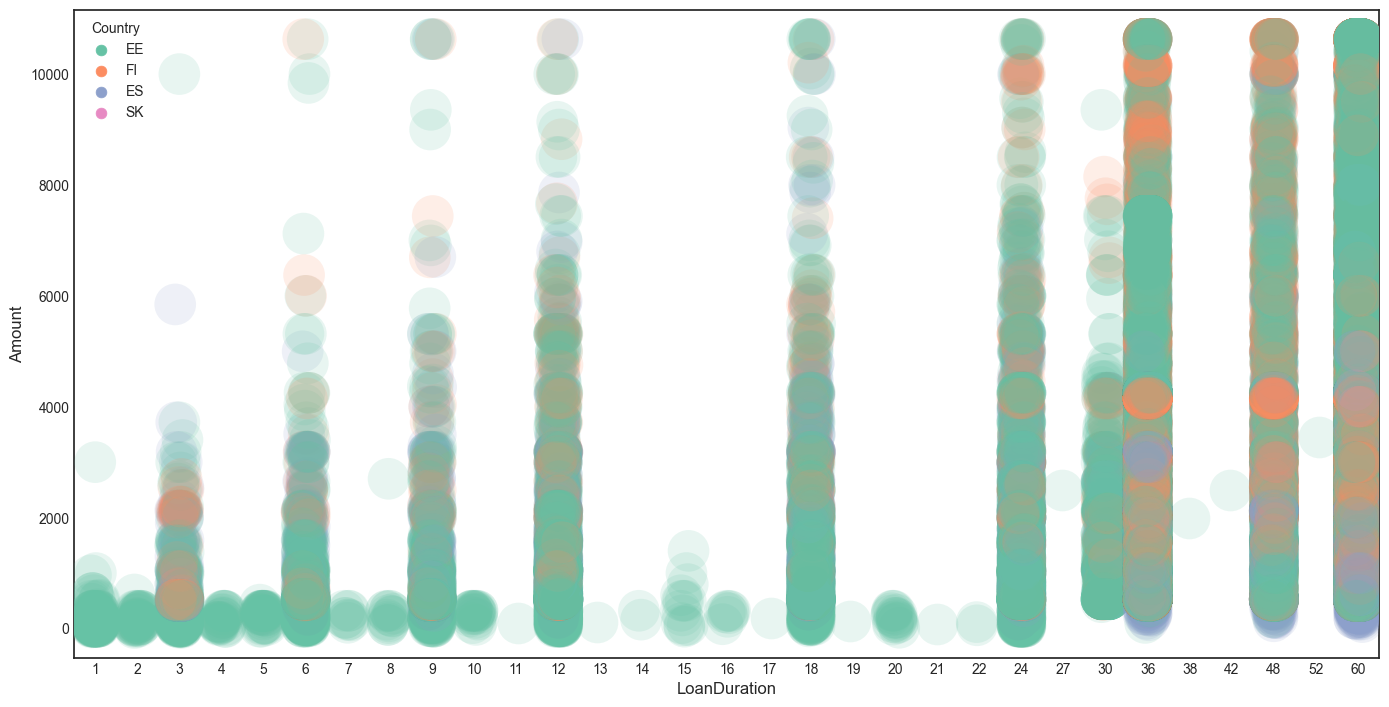

In [102]:

plt.figure(figsize=(15,8),dpi=100)
sns.stripplot(x=loan.LoanDuration,palette='Set2',y=loan.Amount,hue= loan.Country,marker='o',size= 30,alpha=.15)
plt.show()

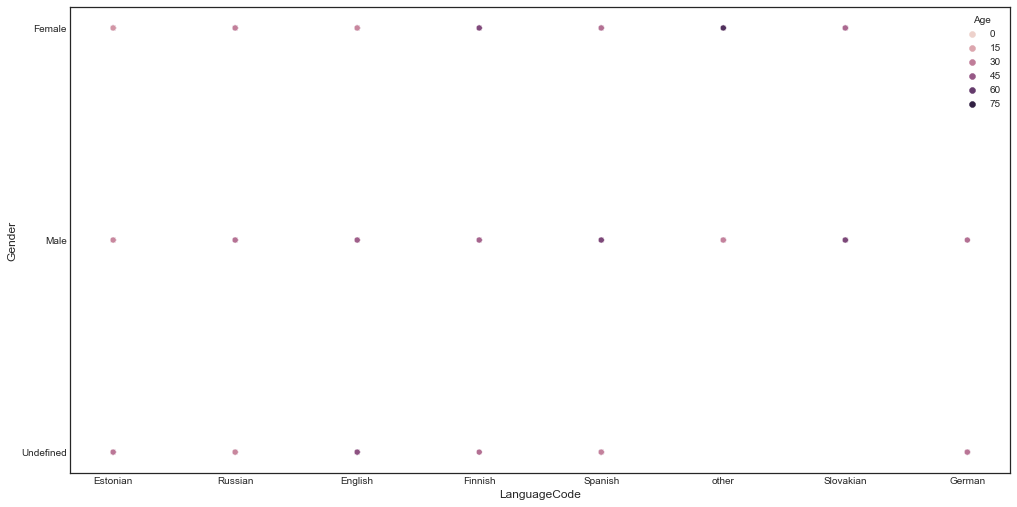

In [103]:
plt.style.use("seaborn-white")
sns.color_palette('plasma')
plt.figure(figsize=(15,8))
sns.scatterplot(x='LanguageCode',y='Gender',hue= 'Age',data=loan)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

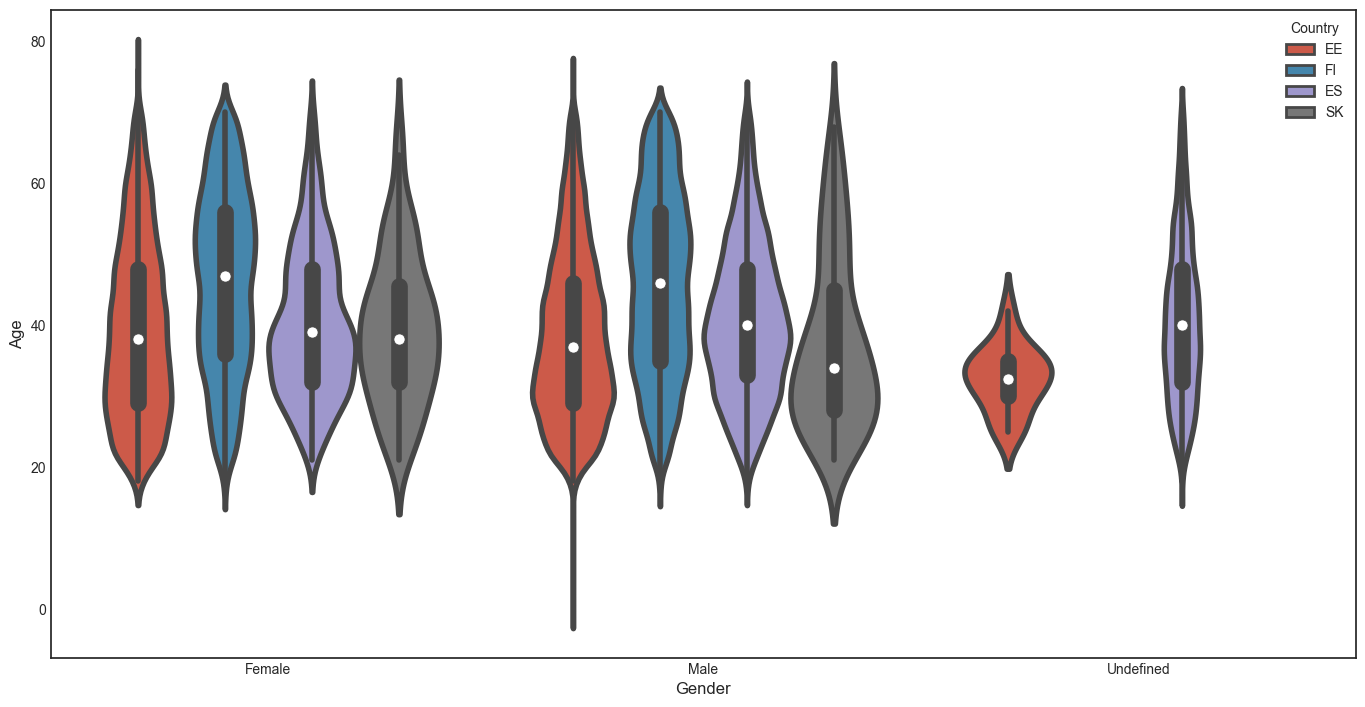

In [104]:
plt.figure(figsize=(15,8),dpi=100)
sns.violinplot(x='Gender' ,y='Age',hue='Country',data=loan)

<AxesSubplot:xlabel='Age', ylabel='Country'>

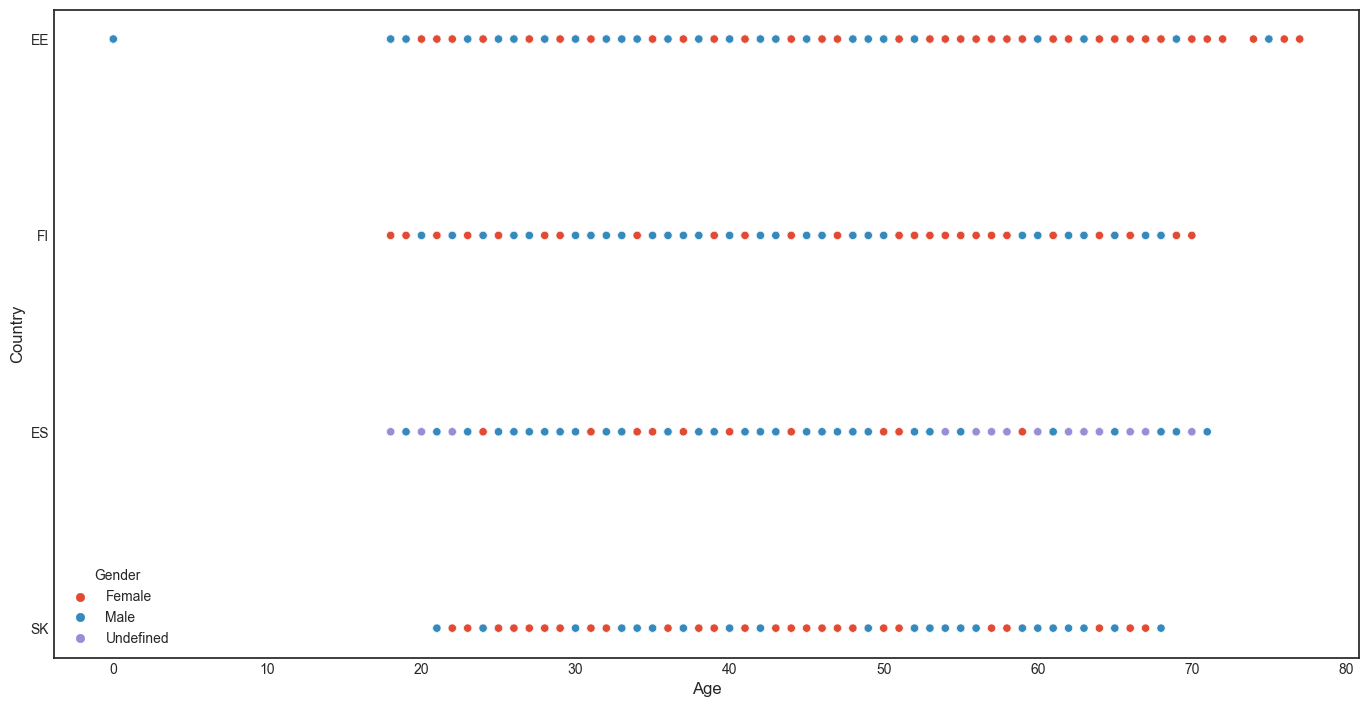

In [105]:
plt.figure(figsize=(15,8),dpi=100)
sns.scatterplot(x='Age' ,y='Country',hue='Gender',data=loan)

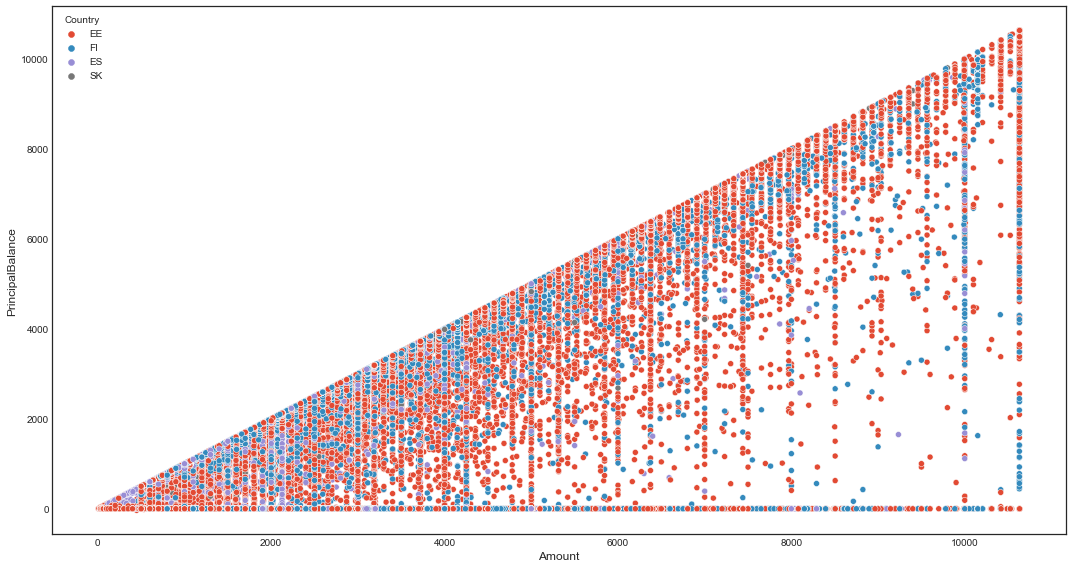

In [106]:
plt.style.use("seaborn-white")
sns.color_palette('plasma')
plt.figure(figsize=(15,8))
sns.scatterplot(y=num_cols["PrincipalBalance"],x=num_cols["Amount"],hue= cat_cols['Country'])
plt.tight_layout()
plt.show()

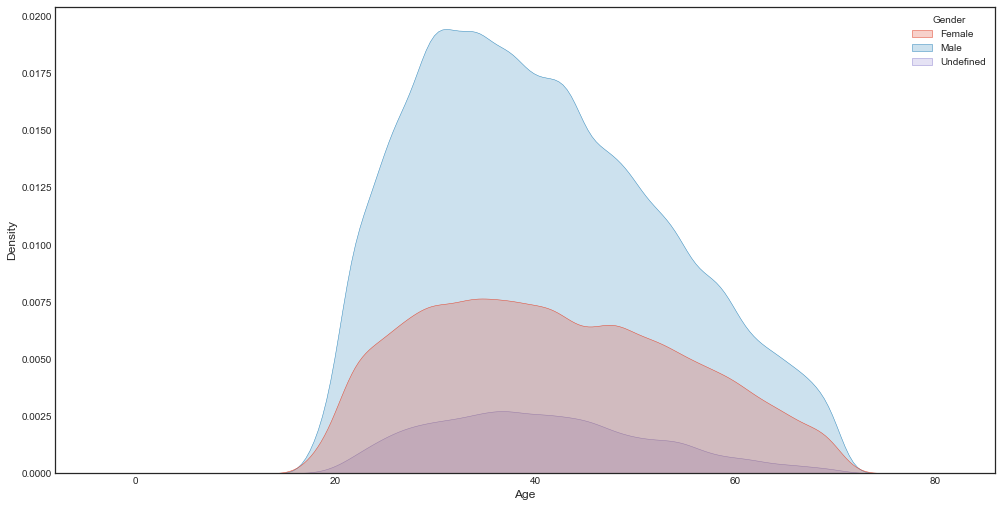

In [107]:
plt.style.use("seaborn-white")
sns.color_palette('plasma')
plt.figure(figsize=(15,8))
sns.kdeplot(num_cols["Age"],shade=True, hue=cat_cols["Gender"])
plt.show()

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

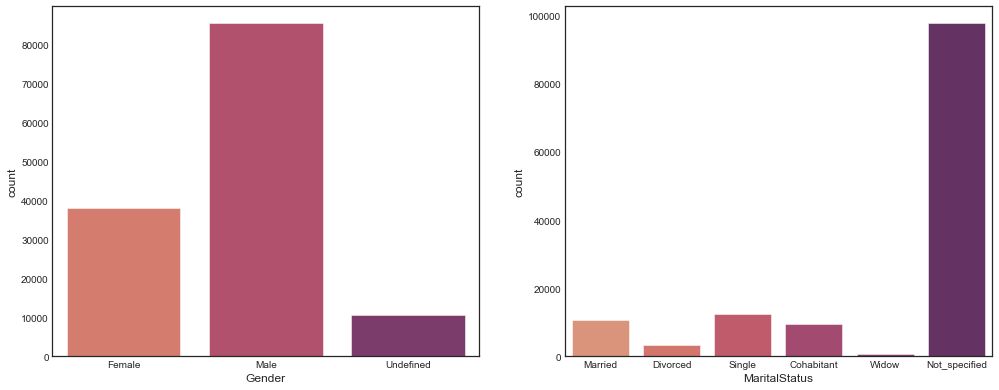

In [108]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(cat_cols["Gender"],palette="flare")
plt.subplot(1,2,2)
sns.countplot(cat_cols["MaritalStatus"],palette="flare")

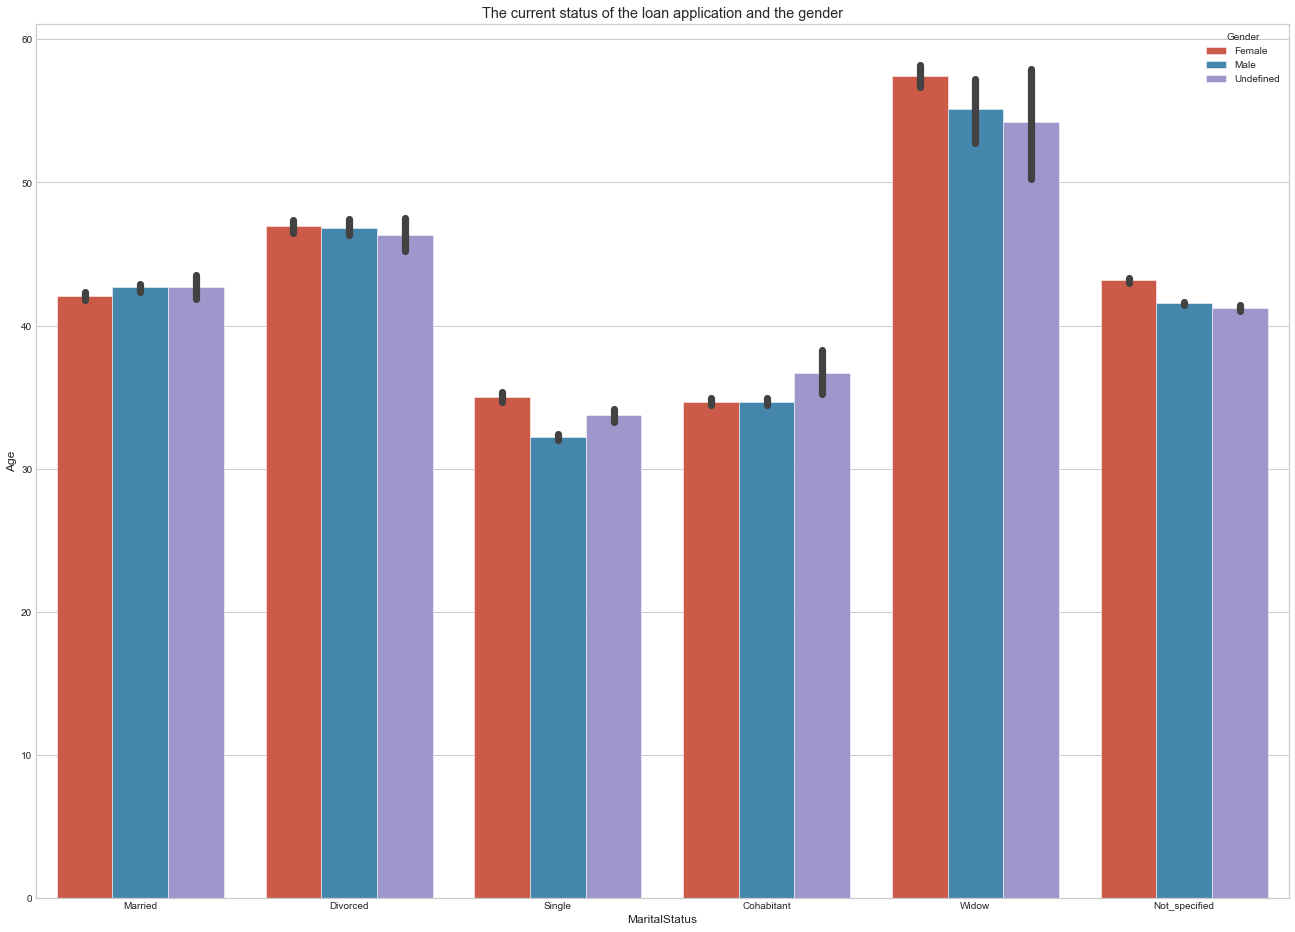

In [109]:
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
sns.barplot(data=loan,x='MaritalStatus',y='Age',hue='Gender')
plt.title("The current status of the loan application and the gender")
plt.show()

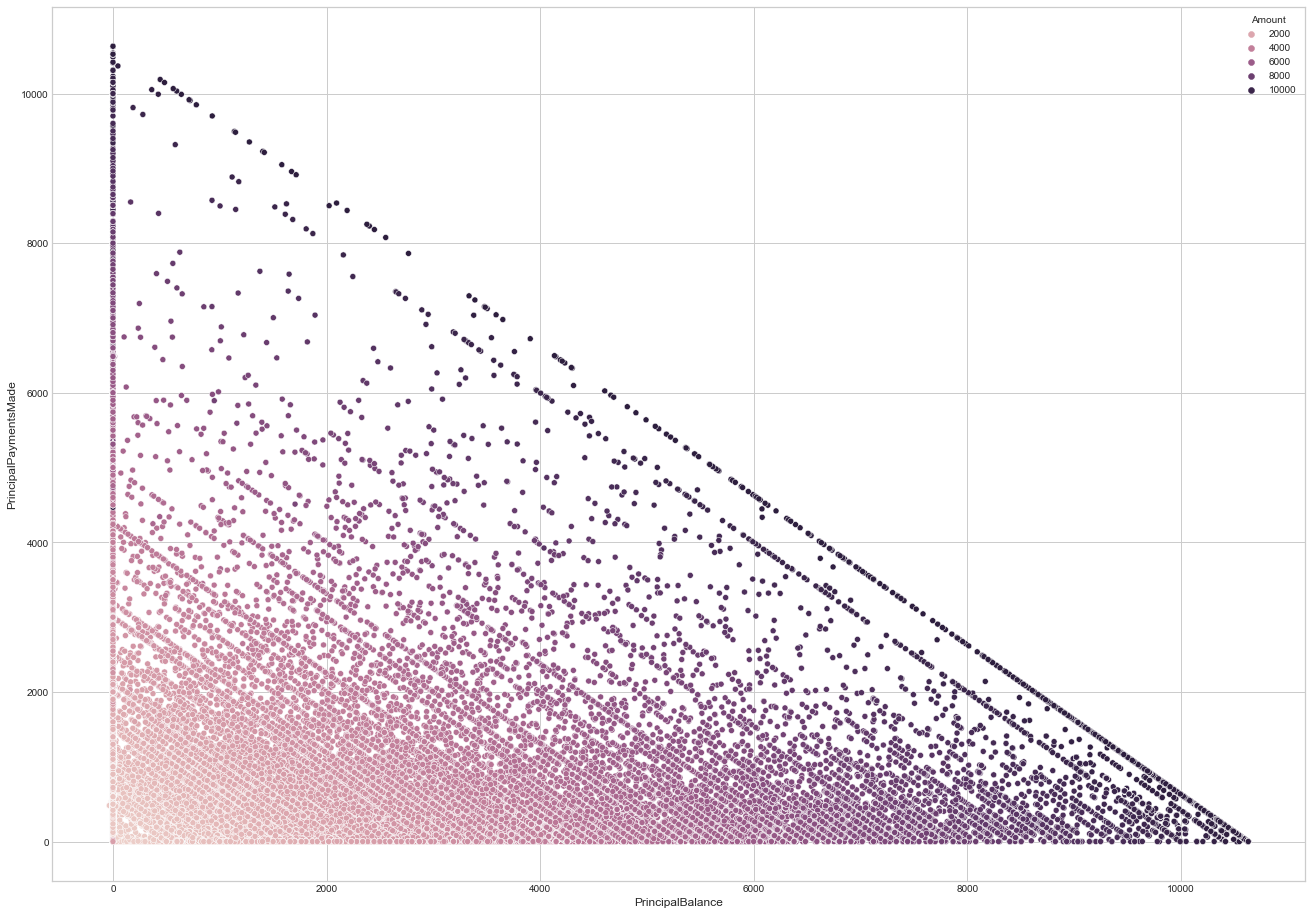

In [110]:
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
sns.scatterplot(data=loan, x=loan.PrincipalBalance,y=loan.PrincipalPaymentsMade,hue=loan.Amount)
plt.show()

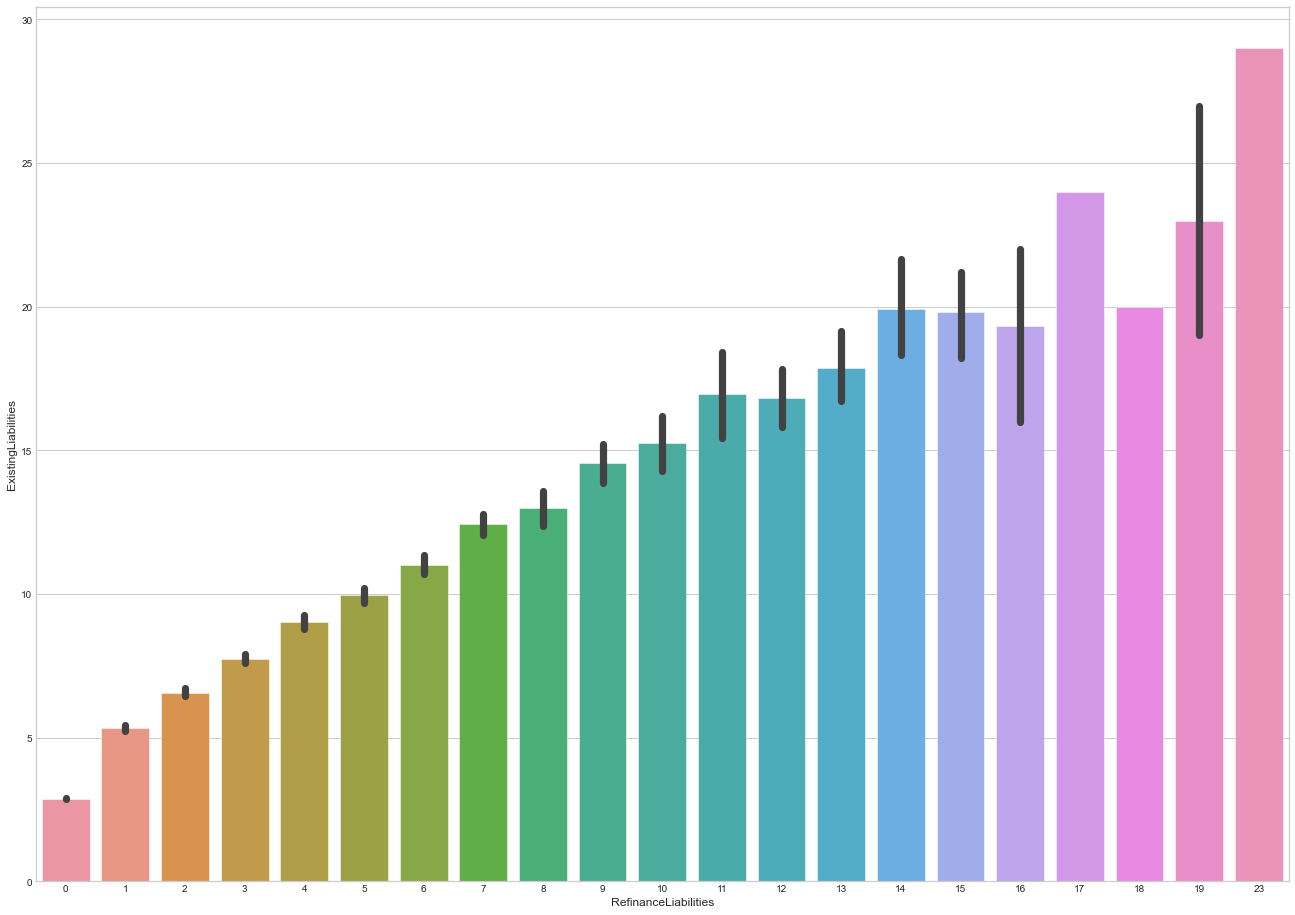

In [111]:
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
sns.barplot(data=num_cols,y=num_cols.ExistingLiabilities,x=num_cols.RefinanceLiabilities)
plt.show()

- First we will delete all the features related to date as it is not a time series analysis so these features will not help in predicting target variable.
- As we can see in numeric column distribution there are many columns which are present as numeric but they are actually categorical as per data description such as Verification Type, Language Code, Gender, Use of Loan, Education, Marital Status,EmployementStatus, OccupationArea etc.
- So we will convert these features to categorical features

Now we will check the distribution of different categorical variables

In [28]:
# for VerificationType value replacement
'''
0 Not set ,1 Income unverified ,2 Income unverified, 
cross-referenced by phone, 3 Income verified ,4 Income and expenses verified
'''
loan.VerificationType.replace({0.0:'Not set',
                               1.0:'Income unverified',
                               2.0:'Income unverified',
                               3.0:'Income verified',
                               4.0:'Income and expenses verified'},
                               inplace=True)

In [29]:
# check the val counts
loan.VerificationType.value_counts()

Income and expenses verified    74572
Income unverified               50476
Income verified                  9428
Not set                             8
Name: VerificationType, dtype: int64

In [30]:
#Gender value replacement
'''
0 Male 1 Woman 2 Undefined
'''

loan.Gender.replace({0.0:'Male',1.0:'Female',2.0:'Undefined'},inplace = True)

In [31]:
# check the val counts
loan.Gender.value_counts()

Male         85650
Female       38213
Undefined    10621
Name: Gender, dtype: int64

In [32]:
#LanguageCode value replacement
'''
1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian
'''

loan.LanguageCode.replace({1:'Estonian',2:'English',3:'Russian',4:'Finnish',
                               5:'German',6:'Spanish',9:'Slovakian'},inplace=True)

loan.LanguageCode.value_counts()

Estonian     64299
Finnish      32155
Spanish      24103
Russian      12694
English        967
Slovakian      295
22               6
German           5
15               1
10               1
13               1
7                1
21               1
Name: LanguageCode, dtype: int64

As we can see from above in language code w ehave only descriptions for values 1,2,3,4,5,6, and 9 but it has other values too like 21,22,15,13,10 and 7 but they are very less it may happen they are local language codes whose decription is not present so we will be treated all these values as others

In [33]:
# code for LanguageCode value replacement
loan.LanguageCode.replace({22:'other',21:'other',7:'other',
                           15:'other',10:'other',13:'other'},inplace = True)

In [34]:
# check the val counts
loan.LanguageCode.value_counts()

Estonian     64299
Finnish      32155
Spanish      24103
Russian      12694
English        967
Slovakian      295
other           11
German           5
Name: LanguageCode, dtype: int64

As we can see from above stats most of the loans are -1 category whose description is not avaialble in Bondoro website so we have dig deeper to find that in Bondora most of the loans happened for which purpose so we find in Bondora [Statistics Page](https://www.bondora.com/en/public-statistics) most of the loans around 34.81% are for Not set purpose. so we will encode -1 as Not set category

In [35]:
#for useofloan columns value replacement
loan.UseOfLoan.replace({-1:'Not set category',0:'Loan consolidation',1:'Real estate',2:'Home improvement',
                        3:'Business',4:'Education',5:'Travel',6:'Vehicle',7:'Other',8:'Health',
                        101:'Working capital financing',102:'Purchase of machinery equipment',
                        103:'Renovation of real estate',104:'Accounts receivable financing',
                        105:'Acquisition of means of transport',106:'Construction finance',
                        107:'Acquisition of stocks',108:'Acquisition of real estate',
                        109:'Guaranteeing obligation',110:'Other business'}, inplace = True)

In [36]:
# check the val counts
loan.UseOfLoan.value_counts()

Not set category                   97946
Other                               9698
Home improvement                    9191
Loan consolidation                  6914
Vehicle                             3150
Business                            1950
Travel                              1787
Health                              1519
Education                           1366
Real estate                          955
Purchase of machinery equipment       21
Other business                        17
Accounts receivable financing          6
Working capital financing              5
Acquisition of stocks                  2
Acquisition of real estate             1
Construction finance                   1
Name: UseOfLoan, dtype: int64

In [37]:
# code for Education value replacement
loan.Education.replace({1:'Primary',2:'Basic education',3:'Vocational education',
                        4:'Secondary education',5:'Higher education'},
                       inplace =True)
loan.Education.value_counts()

Secondary education     51330
Higher education        35398
Vocational education    29260
Primary                 12057
Basic education          6427
0.0                         8
-1.0                        4
Name: Education, dtype: int64

Again as we can see from above description for -1 and 0 in case of education is not present so we will encode them as Not_present as we dont know anything about them.

In [38]:
#  code for -1 and 0 in education column
loan.Education.replace({-1:'Not_present',0:'Not_present'},inplace =True)
loan.Education.value_counts()

Secondary education     51330
Higher education        35398
Vocational education    29260
Primary                 12057
Basic education          6427
Not_present                12
Name: Education, dtype: int64

In [39]:
# code here for MaritalStatus column value replacemnet
loan.MaritalStatus.replace({1:'Married',2:'Cohabitant',3:'Single',4:'Divorced',5:'Widow'},
                           inplace= True)

loan.MaritalStatus.value_counts()

-1.0          97946
Single        12400
Married       10752
Cohabitant     9400
Divorced       3377
Widow           601
0.0               8
Name: MaritalStatus, dtype: int64

Again Marital status of value 0 and -1 has no description so we will encode them as Not_specified

In [40]:
# code for -1 and 0
loan.MaritalStatus.replace({-1:'Not_specified',0:'Not_specified'},inplace = True)
loan.MaritalStatus.value_counts()

Not_specified    97954
Single           12400
Married          10752
Cohabitant        9400
Divorced          3377
Widow              601
Name: MaritalStatus, dtype: int64

In [41]:
#EmploymentStatus column value replacement
loan.EmploymentStatus.replace({1:'Unemployed',2:'Partially employed',3:'Fully employed',
                               4:'Self-employed',5:'Entrepreneur',6:'Retiree'},inplace = True)

In [42]:
#NewCreditCustome column value replacement
'''Did the customer have prior credit history in Bondora
0 Customer had at least 3 months of credit history in Bondora 
1 No prior credit history in Bondora
'''
loan.NewCreditCustomer.replace({True:0,False:1},inplace = True)

In [43]:
#Restructured column value replacement

# The original maturity date of the loan has been increased by more than 60 day

loan.Restructured.replace({True:0,False:1},inplace = True)

In [44]:
#OccupationArea column value replacement
loan.OccupationArea.replace({1:'Other',2:'Mining',3:'Processing',4:'Energy',5:'Utilities',6:'Construction',
                             7:'Retail and wholesale',8:'Transport and warehousing',9:'Hospitality and catering',
                             10:'Info and telecom',11:'Finance and insurance',12:'Real-estate',13:'Research',
                             14:'Administrative',15:'Civil service & military',16:'Education',
                             17:'Healthcare and social help',18:'Art and entertainment',19:'Agriculture,forestry and fishing'},
                            inplace = True)


In [45]:
# HomeOwnershipType column value replacement
loan.HomeOwnershipType.replace({0:'Homeless',1:'Owner',2:'Living with parents',3:'Tenant, pre-furnished property',
                                4:'Tenant, unfurnished property',5:'Council house',6:'Joint tenant',
                                7:'Joint ownership',8:'Mortgage',9:'Owner with encumbrance',
                                10:'Other'},inplace = True)


In [46]:
#EmploymentStatus values replacement
loan.EmploymentStatus.replace({-1:'Not_specified',0:'Not_specified'},inplace = True)


#OccupationArea columns value replacement
loan.OccupationArea.replace({-1:'Not_specified',0:'Not_specified'},inplace = True)

#HomeOwnershipType columns value replacement
loan.HomeOwnershipType.replace({-1:'Not_specified'},inplace = True)

In [47]:
#counts of EmploymentStatus 
loan.EmploymentStatus.value_counts()

Not_specified         97978
Fully employed        30060
Entrepreneur           2007
Retiree                1800
Self-employed          1303
Partially employed     1184
Name: EmploymentStatus, dtype: int64

In [48]:
#counts of OccupationArea 
loan.OccupationArea.value_counts()

Not_specified                       98008
Other                                8421
Retail and wholesale                 3587
Construction                         3312
Processing                           3198
Transport and warehousing            2462
Healthcare and social help           2424
Hospitality and catering             2262
Info and telecom                     1933
Civil service & military             1684
Education                            1430
Finance and insurance                1148
Agriculture,forestry and fishing     1000
Administrative                        843
Art and entertainment                 619
Energy                                587
Research                              564
Real-estate                           477
Utilities                             362
Mining                                122
Name: OccupationArea, dtype: int64

In [49]:
#counts of Restructured
loan.Restructured.value_counts()

1    106900
0     27629
Name: Restructured, dtype: int64

In [50]:
#counts of NewCreditCustomer
loan.NewCreditCustomer.value_counts()

0    77808
1    56721
Name: NewCreditCustomer, dtype: int64

In [51]:
#counts of HomeOwnershipType
loan.HomeOwnershipType.value_counts()

Owner                             47334
Tenant, pre-furnished property    29579
Living with parents               20780
Mortgage                          15457
Other                              7956
Tenant, unfurnished property       4582
Joint ownership                    3337
Joint tenant                       1618
Council house                      1442
Owner with encumbrance              743
Homeless                             46
Not_specified                         3
Name: HomeOwnershipType, dtype: int64

In [52]:
# saving the final data in csv
loan.to_csv('Bondora_preprocessed.csv',index=False)

In [53]:
#make dataframe of new csv file
df=pd.read_csv('Bondora_preprocessed.csv')

In [44]:
# check the first 5 rows of dataframe
df.head()

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer    LoanDate  \
0                     0        0     115.041                  0  2009-06-16   
1                     0        0     140.606                  1  2009-06-15   
2                     0        0     319.558                  0  2009-06-15   
3                     0        0      57.520                  0  2009-06-15   
4                     0        0     319.558                  0  2009-06-14   

  FirstPaymentDate MaturityDate_Original MaturityDate_Last  VerificationType  \
0       2009-07-27            2010-06-25        2010-06-25             2.000   
1       2009-07-15            2009-07-15        2009-07-15             2.000   
2       2009-07-27            2011-02-25        2014-05-13             2.000   
3       2009-07-15            2010-09-15        2010-09-15             2.000   
4       2009-07-27            2010-06-25        2010-06-25             2.000   

   LanguageCode  Age  Gender Country  AppliedAmount  Amount  Interest  \
0             1   61   1.000      EE        319.558 115.041    30.000   
1             1   48   1.000      EE        191.735 140.606    25.000   
2             1   58   1.000      EE        319.558 319.541    25.000   
3             1   23   1.000      EE        127.823  57.520    45.000   
4             1   25   1.000      EE        319.558 319.544    30.000   

   LoanDuration  MonthlyPayment    County          City  UseOfLoan  Education  \
0            12             NaN     HARJU       TALLINN          7      3.000   
1             1             NaN  IDA-VIRU  KOHTLA-JARVE          7      5.000   
2            20             NaN     PÄRNU         PÄRNU          2      4.000   
3            15             NaN     HARJU      PALDISKI          0      2.000   
4            12             NaN     TARTU         TARTU          6      4.000   

  MaritalStatus EmploymentStatus EmploymentDurationCurrentEmployer  \
0       Married   Fully employed                        UpTo3Years   
1      Divorced   Fully employed                    MoreThan5Years   
2       Married   Fully employed                        UpTo4Years   
3        Single              NaN                        UpTo2Years   
4    Cohabitant   Fully employed                        UpTo2Years   

             OccupationArea HomeOwnershipType  IncomeTotal  \
0      Retail and wholesale               NaN    10500.000   
1                 Education               NaN    10800.000   
2  Hospitality and catering               NaN     7000.000   
3                     Other               NaN    11600.000   
4      Retail and wholesale               NaN     6800.000   

   ExistingLiabilities  LiabilitiesTotal  RefinanceLiabilities  DebtToIncome  \
0                    0             0.000                     0         0.000   
1                    0             0.000                     0         0.000   
2                    0             0.000                     0         0.000   
3                    0             0.000                     0         0.000   
4                    0             0.000                     0         0.000   

   FreeCash  MonthlyPaymentDay LastPaymentOn Rating  Restructured  \
0     0.000                 25    2010-07-06    NaN             1   
1     0.000                 15    2009-07-07    NaN             1   
2     0.000                 25    2012-10-01    NaN             0   
3     0.000                 15    2010-09-15    NaN             1   
4     0.000                 25    2015-07-16    NaN             1   

  CreditScoreEsMicroL  PrincipalPaymentsMade  InterestAndPenaltyPaymentsMade  \
0                 NaN                115.041                          20.422   
1                 NaN                140.606                           2.023   
2                 NaN                203.191                          59.763   
3                 NaN                 57.520                          18.732   
4                 NaN          

In [45]:
# for proper visualization
df.head().T

0               1  \
BidsPortfolioManager                                       0               0   
BidsApi                                                    0               0   
BidsManual                                           115.041         140.606   
NewCreditCustomer                                          0               1   
LoanDate                                          2009-06-16      2009-06-15   
FirstPaymentDate                                  2009-07-27      2009-07-15   
MaturityDate_Original                             2010-06-25      2009-07-15   
MaturityDate_Last                                 2010-06-25      2009-07-15   
VerificationType                                       2.000           2.000   
LanguageCode                                               1               1   
Age                                                       61              48   
Gender                                                 1.000           1.000   
Country                                                   EE              EE   
AppliedAmount                                        319.558         191.735   
Amount                                               115.041         140.606   
Interest                                              30.000          25.000   
LoanDuration                                              12               1   
MonthlyPayment                                           NaN             NaN   
County                                                 HARJU        IDA-VIRU   
City                                                 TALLINN    KOHTLA-JARVE   
UseOfLoan                                                  7               7   
Education                                              3.000           5.000   
MaritalStatus                                        Married        Divorced   
EmploymentStatus                              Fully employed  Fully employed   
EmploymentDurationCurrentEmployer                 UpTo3Years  MoreThan5Years   
OccupationArea                          Retail and wholesale       Education   
HomeOwnershipType                                        NaN             NaN   
IncomeTotal                                        10500.000       10800.000   
ExistingLiabilities                                        0               0   
LiabilitiesTotal                                       0.000           0.000   
RefinanceLiabilities                                       0               0   
DebtToIncome                                           0.000           0.000   
FreeCash                                               0.000           0.000   
MonthlyPaymentDay                                         25              15   
LastPaymentOn                                     2010-07-06      2009-07-07   
Rating                                                   NaN             NaN   
Restructured                                               1               1   
CreditScoreEsMicroL                                      NaN             NaN   
PrincipalPaymentsMade                                115.041         140.606   
InterestAndPenaltyPaymentsMade                        20.422           2.023   
PrincipalBalance                                       0.000           0.000   
InterestAndPenaltyBalance                              0.000           0.000   
NoOfPreviousLoansBeforeLoan                                1               2   
AmountOfPreviousLoansBeforeLoan                       83.085         255.647   
PreviousRepaymentsBeforeLoan                           0.000         258.626   
PreviousEarlyRepaymentsCountBeforeLoan                     0               0   

                                                               2           3  \
BidsPortfolioManager                                           0           0   
BidsApi                                                        0           0   
BidsManual                                               3

 > # Thank You !